# Final Group Project - New York Airbnb Analytics

Eunice  
Fandi   
Pascal   
Shivangi   
Vivek   

#  Framing the Problem

Airbnb operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. It allows people (hosts) to list their propoerties for short-term rentals and earns money through the commission for each booking. The business model is based on the idea that these rentals are cheaper than hotels, making the company a threat to hotel industry. The value proposition to hosts is side income, while for the guests it is cheaper accomodation. 

The market of these short-term rentals in a city is highly competitive because renters are presented with a broad range of selection of listings for their specific criteria. Since Airbnb is a marketplace, the dynamics of marketplace have a huge influence on the the amount a host can charge on a nightly basis. This is in fact one of the biggest challenges for the hosts: deciding the prices for their listing. If they charge above the market place, they will lose out on revenue as the renters will most liklely find another affordable alternatives. If the price is set too low, then they again lose out on profits. Additionally, renters may lose out on the opprtunity to live at a great place. 

For this project, our goal is build a regression model that can accurately predict the price of the listing, which will help hosts to decide what price they should list their property at. Additionally, the machine learning algorithms will also provide insighst into what factors influence the pricing of these rentals. If they are something that can be controlled by the hosts, then they can use the insghts from this analysis to improve those factors and provide better accomodation to guests. For the scope of this project, we will only be looking at properties in New York considering that New York is a highly competitive marketplace for Airbnb. The dataset that we have used is from the website below:

Hypothesis:

Link to the dataset:http://insideairbnb.com/get-the-data.html

**This project was started afresh and was not continuation from first semester


# #Setup
**IMPORT PACKAGES**

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

#Pandas Profiling
#!pip install pandas_profiling
import pandas_profiling

# To plot pretty figures
#!pip install -U seaborn
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
import gc
warnings.simplefilter(action='ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

#Display multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# 1) Data Acquisition

**IMPORT DATA**

In [2]:
import pandas as pd
df1=pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2021-02-04/data/listings.csv.gz')

In [3]:
df1.head()

id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20210204180331   2021-02-05   
1  3831  https://www.airbnb.com/rooms/3831  20210204180331   2021-02-05   
2  5121  https://www.airbnb.com/rooms/5121  20210204180331   2021-02-05   
3  5178  https://www.airbnb.com/rooms/5178  20210204180331   2021-02-05   
4  5203  https://www.airbnb.com/rooms/5203  20210204180331   2021-02-06   

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                    BlissArtsSpace!   
3                   Large Furnished Room Near B'way　   
4                 Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   
2                                                NaN   
3    Theater district, many restaurants around here.   
4  Our neighborhood is full of restaurants and ca...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/e49999c2-9fd5...     4869   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356   
3  https://a0.muscache.com/pictures/12065/f070997...     8967   
4  https://a0.muscache.com/pictures/103776/b37157...     7490   

                                 host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/2845  ...                        10.0   
1  https://www.airbnb.com/users/show/4869  ...                        10.0   
2  https://www.airbnb.com/users/show/7356  ...                        10.0   
3  https://www.airbnb.com/users/show/8967  ...                         9.0   
4  https://www.airbnb.com/users/show/7490  ...                        10.0   

  review_scores_location review_scores_value license instant_bookable  \
0                   10.0                 9.0     NaN                f   
1                   10.0                10.0     NaN                f   
2                    9.0                 9.0     NaN                f   
3                   10.0                 9.0     NaN                f   
4                   10.0                10.0     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           2   
1                              1                                           1   
2                              1                                           0   
3                              1                                           0   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            1   
3                                            1   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.35  
1                                           0              4.99  
2                                           0              0.35  
3                                           0              3.31  
4                                           0              0.85  

[5 rows x 74 columns]

In [4]:
df1.shape 

(37012, 74)

**DATA DICTIONARY**

Since there was no official data dictionary, we used Airbnb's webiste to interpret some of the features. Considering there are 74 variables including a lot of variables such a different ids and urls and granular information regarding host (id, url, picture_url etc.) that would not be used in the analysis, we decided to drop some of these. We have only provided dictionary for the variables that we will be using and are not explainable by their names.

In [5]:
df1.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [6]:
df1 = df1.drop(columns = ['id', 'listing_url', 'scrape_id',
       'picture_url', 'host_id', 'host_url', 'host_name','host_location',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'neighbourhood',
       'bathrooms', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'number_of_reviews_l30d', 'license',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'])

df1.head()

last_scraped                                               name  \
0   2021-02-05                              Skylit Midtown Castle   
1   2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2   2021-02-05                                    BlissArtsSpace!   
3   2021-02-05                   Large Furnished Room Near B'way　   
4   2021-02-06                 Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  host_since  \
0  Centrally located in the heart of Manhattan ju...  2008-09-09   
1  Just the right mix of urban center and local n...  2008-12-07   
2                                                NaN  2009-02-03   
3    Theater district, many restaurants around here.  2009-03-03   
4  Our neighborhood is full of restaurants and ca...  2009-02-05   

                                          host_about  host_response_time  \
0  A New Yorker since 2000! My passion is creatin...  within a few hours   
1  Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2   I am an artist(painter, filmmaker) and curato...                 NaN   
3  I used to work for a financial industry but no...        within a day   
4  Welcome to family life with my oldest two away...                 NaN   

  host_response_rate host_acceptance_rate host_is_superhost  ...  last_review  \
0                93%                  26%                 f  ...   2019-11-04   
1                98%                  93%                 f  ...   2021-01-27   
2                NaN                  NaN                 f  ...   2019-12-02   
3               100%                 100%                 f  ...   2020-09-25   
4                NaN                  NaN                 f  ...   2017-07-21   

  review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0                 94.0                    9.0                       9.0   
1                 90.0                   10.0                       9.0   
2                 90.0                    8.0                       8.0   
3                 84.0                    9.0                       8.0   
4                 98.0                   10.0                      10.0   

  review_scores_checkin review_scores_communication  review_scores_location  \
0                  10.0                        10.0                    10.0   
1                   9.0                        10.0                    10.0   
2                  10.0                        10.0                     9.0   
3                   9.0                         9.0                    10.0   
4                  10.0                        10.0                    10.0   

   review_scores_value instant_bookable reviews_per_month  
0                  9.0                f              0.35  
1                 10.0                f              4.99  
2                  9.0                f              0.35  
3                  9.0                f              3.31  
4                 10.0                f              0.85  

[5 rows x 45 columns]

In [7]:
df1.columns

Index(['last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_since', 'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dt

The first few variables are related to host, which include his/her details like their response rate, information regarding their profile. Then the next few variables are regarding the property itself. The next few variables are not very intuitive and their description is given below: 

accommodates - how many people the property accommodates
<br>minimum_nights - number of minimum nights guests have to stay 
<br>maximum_nights - number of maximum nights guests are allowed to stay
<br>number_of_reviews_ltm - Number of reviews in last 12 months
<br>number_of_reviews_l30d - umber of reviews in last 30 days
<br>first_review - Date first review was posted 
<br>last_review - Date last review was posted 
<br>review_scores_rating - Rating of host for overall experience
<br>review_scores_accuracy - Rating of host for accuracy of listings
<br> review_scores_cleanliness - Rating of host for cleanliness
<br>review_scores_checkin - Rating of host for checking experience
<br> review_scores_communication - Rating of host for communication
<br>review_scores_location - Rating score for location
<br>review_scores_value - Rating for property's worth (value)
<br>instant_bookable - If property can be instantly booked  (i.e. booked straight away, without having to message the host first and wait to be accepted)
<br>reviews_per_month - Reviews per month

# 2 - Exploratory Data Analysis

## A) Data Exploration

**CHECK DATA TYPES**

In [8]:
df1.dtypes

last_scraped                     object
name                             object
description                      object
neighborhood_overview            object
host_since                       object
host_about                       object
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
host_total_listings_count       float64
host_verifications               object
host_has_profile_pic             object
host_identity_verified           object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms_text                   object
bedrooms                        float64
beds                            float64
amenities                        object


We observe that, the following columns need to be changed to the correect data type.
<br> - first_review, host_since, last_review --> changed to 'date'.
<br>- host_response_rate, host_acceptance_rate, price --> changed to a 'numerical' column

In [9]:
#change variables to 'date' type
df1['host_since']=pd.to_datetime(df1['host_since'])
df1['first_review']=pd.to_datetime(df1['first_review'])
df1['last_review']=pd.to_datetime(df1['last_review'])
df1.dtypes

last_scraped                            object
name                                    object
description                             object
neighborhood_overview                   object
host_since                      datetime64[ns]
host_about                              object
host_response_time                      object
host_response_rate                      object
host_acceptance_rate                    object
host_is_superhost                       object
host_total_listings_count              float64
host_verifications                      object
host_has_profile_pic                    object
host_identity_verified                  object
neighbourhood_cleansed                  object
neighbourhood_group_cleansed            object
latitude                               float64
longitude                              float64
property_type                           object
room_type                               object
accommodates                             int64
bathrooms_tex

In [10]:
#change variables to numerical
#get all the non-null values and Convert the object datatype to numerical datatype: host_response_rate, host_acceptance_rate
df1['host_response_rate'] = df1['host_response_rate'].astype(str).str.replace('%', '').astype(float)
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].astype(str).str.replace('%', '').astype(float)
df1['price'] = df1['price'].str.replace(',', '').str.replace('$', '').astype(float)

<AxesSubplot:>

Text(0.5, 1.0, 'Number of columns by data types')

Text(0.5, 0, 'Number of columns')

Text(0, 0.5, 'Data type')

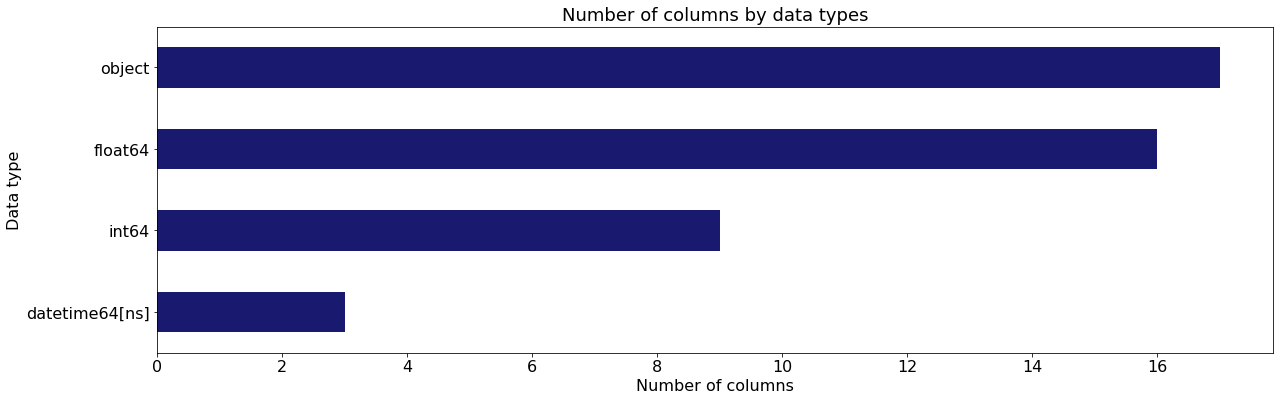

In [11]:
df1.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(20, 6),
                                            fontsize=16,
                                           color="midnightblue")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

**SUMMARY STATISTICS**

In [12]:
df1.describe()

host_response_rate  host_acceptance_rate  host_total_listings_count  \
count        18505.000000          22379.000000               36994.000000   
mean            88.525588             80.471245                  23.974158   
std             25.023465             28.085157                 158.224860   
min              0.000000              0.000000                   0.000000   
25%             90.000000             73.000000                   1.000000   
50%            100.000000             94.000000                   1.000000   
75%            100.000000            100.000000                   2.000000   
max            100.000000            100.000000                2739.000000   

           latitude     longitude  accommodates      bedrooms          beds  \
count  37012.000000  37012.000000  37012.000000  33404.000000  36522.000000   
mean      40.729653    -73.950989      2.797633      1.316399      1.533925   
std        0.054710      0.048291      1.845570      0.722094      1.141557   
min       40.508680    -74.239860      0.000000      1.000000      0.000000   
25%       40.690320    -73.983812      2.000000      1.000000      1.000000   
50%       40.725465    -73.955790      2.000000      1.000000      1.000000   
75%       40.762480    -73.933720      4.000000      1.000000      2.000000   
max       40.912140    -73.710870     16.000000     21.000000     42.000000   

              price  minimum_nights  ...  number_of_reviews  \
count  37012.000000    37012.000000  ...       37012.000000   
mean     142.842240       23.323679  ...          22.904112   
std      275.740987       26.441255  ...          47.864720   
min        0.000000        1.000000  ...           0.000000   
25%       60.000000        4.000000  ...           0.000000   
50%       99.000000       30.000000  ...           4.000000   
75%      151.000000       30.000000  ...          20.000000   
max    10000.000000     1250.000000  ...         753.000000   

       number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
count           37012.000000          26777.000000            26753.000000   
mean                2.752648             93.767188                9.586551   
std                 9.582048              9.594491                0.938881   
min                 0.000000             20.000000                2.000000   
25%                 0.000000             92.000000                9.000000   
50%                 0.000000             97.000000               10.000000   
75%                 2.000000            100.000000               10.000000   
max               514.000000            100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count               26764.000000           26741.000000   
mean                    9.268009               9.721140   
std                     1.146266               0.823948   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                 26755.000000            26740.000000   
mean                      9.712801                9.599589   
std                       0.859563                0.794767   
min                       2.000000                2.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  reviews_per_month  
count         26740.000000       27489.000000  
mean              9.367539           0.867197  
std               1.014201           1.320503  
min               2.000000           0

**PANDAS PROFILING**

In [13]:
#Generate a HTML report
profile = df1.profile_report(title='Pandas Profiling Report')
#profile

profile.to_file(output_file="profile_report_output.html")

Summarize dataset:   0%|          | 0/58 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Insights from the profile report: 
<br>1. A lot of variables regarding host have missing values; bathrooms variables is all null values
<br>2. Room type and propert type are highly correlated 
<br>3. Avialbility_30, Availability_60 and Availability_90 are highly correlated 

**SOME DATA CLEANING**

A lot of variables include text, hence, they will be need to processed by either modifying them or creating new variables out of them. Most of these columns included description regarding the property or neighbourhood or about the host. Some columns are just dates so having differences between those dates would be more useful. 

In [14]:
#=======================================================Data Cleansing===================================================
#Only pick the Airbnb apartment with reviews
#df1=df1[df1['number_of_reviews'].astype(int)>0]

#Only pick the Airbnb apartment with price
#df1=df1[df1['price']>0]

#Only pick the Airbnb with the answer(t/f) for "host_is_superhost"
#df1=df1[df1['host_is_superhost'].apply(lambda x: len(str(x))==1)]

#Drop other answer except f/t in "instant_bookable"
#df1=df1[df1['instant_bookable'].isin(['f','t'])]

#To drop the review score which lower than 21 (potential outliers)
#df1=df1[df1['review_scores_rating']>21]

#Replace all the blank cell with NaN value
df1=df1.replace('',np.NaN)

#========================================================Add new features===============================================

#Get the length of the sentence in following five columns (number of words)
df1['name_length']  = df1['name'].apply(lambda x: len(str(x).split()))
df1['description_length']=df1['description'].apply(lambda x: len(str(x).split()))
df1['host_about_length']=df1['host_about'].apply(lambda x: len(str(x).split()))
df1['verifications_length']=df1['host_verifications'].apply(lambda x: len(str(x).split(',')))
df1['amenities_length']=df1['amenities'].apply(lambda x: len(str(x).split(',')))

#Get the difference between the "last_scraped" with the following dates (in days)
df1['host_since_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['host_since'])).dt.days
df1['first_review_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['first_review'])).dt.days
df1['last_review_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['last_review'])).dt.days

#drop 'last_scraped, host_since, first_reviews, last_review'
df1 = df1.drop(columns = ['last_scraped', 'host_since','first_review','last_review'])
                          
#Get the new column to express the price per accommodate
df1['price_per_accommodates']=df1['price']/df1['accommodates'].astype(float)
#=====================================================Change the data type=============================================
#Convert the categorical columns to dummified columns
list_col=['host_is_superhost','host_identity_verified','instant_bookable', 'host_has_profile_pic']
for i in list_col:
    df1[i] = np.where(df1[i]== 't', 1, 0)

**CHECK MISSING VALUES**

In [15]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Missing values statistics
miss_values = missing_values(df1)
miss_values

Dataframe has 50 columns.
There are 23 columns that have missing values.


Missing Values  % of Total Values
host_response_time                    18507               50.0
host_response_rate                    18507               50.0
host_about                            14844               40.1
host_acceptance_rate                  14633               39.5
neighborhood_overview                 13683               37.0
review_scores_value                   10272               27.8
review_scores_location                10272               27.8
review_scores_checkin                 10271               27.8
review_scores_accuracy                10259               27.7
review_scores_communication           10257               27.7
review_scores_cleanliness             10248               27.7
review_scores_rating                  10235               27.7
reviews_per_month                      9523               25.7
first_review_days                      9523               25.7
last_review_days                       9523               25.7
bedrooms                               3608                9.7
description                            1223                3.3
beds                                    490                1.3
bathrooms_text                          102                0.3
host_total_listings_count                18                0.0
host_since_days                          18                0.0
name                                     13                0.0
price_per_accommodates                   13                0.0

<AxesSubplot:>

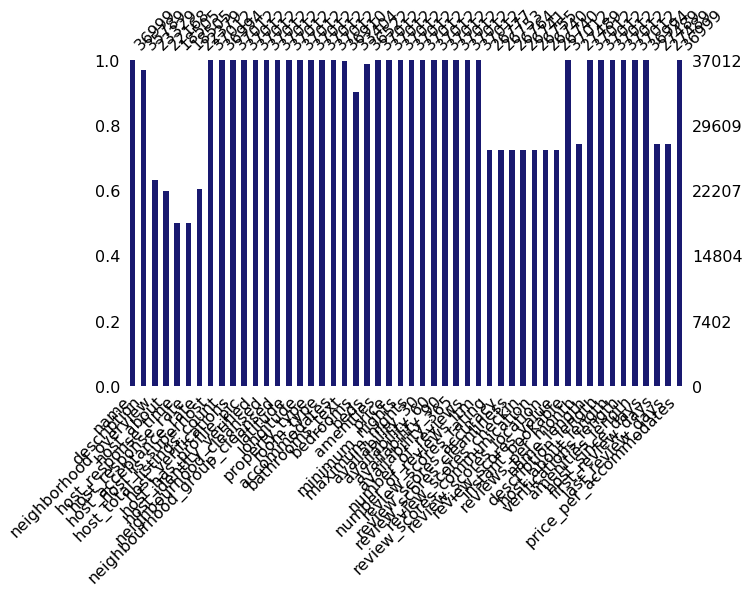

In [16]:
import missingno as msno
#msno.matrix(df.sample(500), figsize=(12,8))
msno.bar(df1, figsize=(10,6), color='midnightblue')

**TARGET VARIABLE**
Check distribution of 'Price' variable

In [17]:
#df1['price'].value_counts().plot(kind='bar', color='midnightblue')

<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='price', ylabel='Density'>

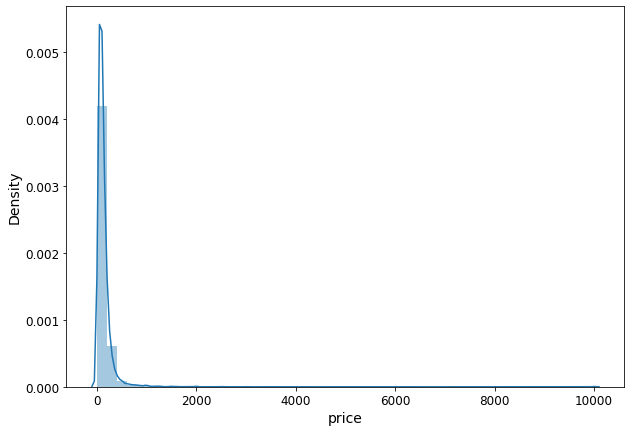

In [18]:
plt.figure(figsize=(10,7))
sns.distplot(df1.price)

The target variable is very heavily right skewed!

**CORRELATIONS between predictors and target variable**

In [19]:
corr = df1.corr()['price'].sort_values()
corr

longitude                     -0.101170
host_response_rate            -0.060710
number_of_reviews             -0.035886
reviews_per_month             -0.030737
host_acceptance_rate          -0.030403
verifications_length          -0.025068
number_of_reviews_ltm         -0.023899
host_identity_verified        -0.018834
host_is_superhost             -0.012657
review_scores_value           -0.007769
review_scores_checkin         -0.007539
host_has_profile_pic          -0.007348
description_length            -0.006389
host_about_length             -0.001419
instant_bookable              -0.000616
maximum_nights                -0.000235
review_scores_communication    0.001680
review_scores_accuracy         0.002778
name_length                    0.003577
host_since_days                0.019429
latitude                       0.019951
review_scores_rating           0.021382
minimum_nights                 0.023094
first_review_days              0.024820
review_scores_cleanliness      0.033119


**There is no multicollinearity between the target variable and the predictors. All correlation values are below 0.8**

**CATEGORICAL VARIABLES**

**Number of categories in each categorical variable**

In [20]:
df1.select_dtypes('object').apply(pd.Series.nunique, axis=0)

name                            35912
description                     33912
neighborhood_overview           19385
host_about                      15481
host_response_time                  4
host_verifications                524
neighbourhood_cleansed            220
neighbourhood_group_cleansed        5
property_type                      75
room_type                           4
bathrooms_text                     36
amenities                       31671
dtype: int64

In [21]:
df1['host_response_time'].value_counts()

within an hour        10143
within a few hours     3937
within a day           3039
a few days or more     1386
Name: host_response_time, dtype: int64

In [22]:
df1['neighbourhood_group_cleansed'].value_counts()

Manhattan        16553
Brooklyn         14474
Queens            4704
Bronx              992
Staten Island      289
Name: neighbourhood_group_cleansed, dtype: int64

In [23]:
df1['property_type'].value_counts().head(50)

Entire apartment                      15506
Private room in apartment             12037
Private room in house                  1897
Private room in townhouse              1044
Entire condominium                      983
Entire house                            949
Entire loft                             628
Entire townhouse                        589
Shared room in apartment                501
Private room in condominium             477
Room in hotel                           371
Private room in loft                    351
Room in boutique hotel                  336
Entire serviced apartment               301
Entire guest suite                      231
Private room in guest suite             103
Shared room in house                     80
Private room in hostel                   52
Room in aparthotel                       51
Entire guesthouse                        45
Room in serviced apartment               43
Shared room in loft                      38
Private room in serviced apartme

In [24]:
df1['room_type'].value_counts()

Entire home/apt    19397
Private room       16630
Shared room          686
Hotel room           299
Name: room_type, dtype: int64

### Some Data Transformation
To make visualization easier and more insightful

**BATHROOM TEXT**

Deriving the number and type of bathroom from the 'bathroom_text' variable

In [25]:
df1['bathrooms_text']=df1['bathrooms_text'].astype(str)
df1['bathrooms_text']=df1['bathrooms_text'].replace('nan','nan nan')

df1['bathrooms_list']  = df1['bathrooms_text'].apply(lambda x: (x.split(" ", 1)))
df1['bathrooms_list']

new_val=[]
for lst in np.array(df1['bathrooms_list']):
    if len(lst)!=2:
        lst.append(" ")
    new_val.append(lst)
    
df1['bathrooms_list']=new_val
list_num=[]
list_name=[]
for i in np.array(df1['bathrooms_list']):
    list_num.append(i[0])
    list_name.append(i[1])
df1['num_bath']=list_num
df1['name_bath']=list_name

df1=df1.drop('bathrooms_list',axis=1)

0               [1, bath]
1               [1, bath]
2              [nan, nan]
3               [1, bath]
4        [1, shared bath]
               ...       
37007           [1, bath]
37008    [1, shared bath]
37009    [1, shared bath]
37010    [1, shared bath]
37011    [1, shared bath]
Name: bathrooms_list, Length: 37012, dtype: object

In [26]:
df1['num_bath'].value_counts().head(20)

#Replace some values to make them numerical
df1['num_bath'] = df1['num_bath'].replace({'Half-bath': 0.5, 'Shared':0.5, 'Private':1})

df1['num_bath'].value_counts().head(20)

1            30654
2             3245
1.5           1802
2.5            400
3              322
0              164
nan            102
4               97
3.5             74
Half-bath       36
4.5             25
Shared          18
Private         17
5               16
6               15
8                9
5.5              5
6.5              4
7.5              3
7                3
Name: num_bath, dtype: int64

1       30654
2        3245
1.5      1802
2.5       400
3         322
0         164
nan       102
4          97
3.5        74
0.5        54
4.5        25
1          17
5          16
6          15
8           9
5.5         5
6.5         4
7.5         3
7           3
15.5        1
Name: num_bath, dtype: int64

In [27]:
df1['name_bath'].value_counts().head(20)

#replace some duplicate categories
df1['name_bath'] = df1['name_bath'].replace({'shared baths': 'shared bath', 'baths':'private bath', 'bath':'private bath'})

df1['name_bath'].value_counts().head(20)

bath            19138
shared bath      9420
baths            3992
shared baths     2193
private bath     2096
nan               102
                   36
half-bath          35
Name: name_bath, dtype: int64

private bath    25226
shared bath     11613
nan               102
                   36
half-bath          35
Name: name_bath, dtype: int64

In [28]:
df1.property_type.replace({
    'Tiny house': 'House',                           
'Shared room in townhouse':'Townhouse',
'Private room in earth house'           :'Other',
'Shared room in serviced apartment'     :'Apartment',
'Private room in bungalow'              :'Bunglow',
'Entire cottage'                        :'Other',
'Houseboat'                             :'Other',
'Entire villa'                          :'House',
'Boat'                                  :'Other',
'Entire home/apt'                       :'Other',
'Private room in casa particular'       :'Other',
'Private room in floor'                 :'Other',
'Shared room in bed and breakfast'      :'Other',
'Private room in barn'                  :'Other',
'Private room in castle'                :'Other',
'Private room in cottage'               :'Other',
'Barn'                                 :'Other',
'Cave'                                  :'Other',
'Private room in cabin'                 :'Other',
'Shared room in guest suite':'Other',
'Private room in dome house'  :'Other',
'Shared room in guesthouse'   :'Other',
'Private room in dorm'        :'Other',
'Lighthouse'                  :'Other',
'Shared room in island'       :'Other',
'Room in resort'              :'Other',
'Bus'                         :'Other',
'Shared room in earth house'  :'Other',
'Private room in camper/rv'   :'Other',
'Shared room in bungalow'     :'Other',
'Private room in train'       :'Other',
'Private room in farm stay'   :'Other',
'Private room in in-law'  :'Other',
'Private room in lighthouse'  :'Other',          
'Private room in tent'  :'Other',     
'Entire bed and breakfast'  :'Other',
'Room in hostel'   :'Other',
'Shared room in floor':'Other',
'Private room in bed and breakfast': 'Room in bed and breakfast',
'Entire place':'House',                                         
'Shared room in condominium': 'Condo',
'Private room' :'Private room in house',                     
'Camper/RV':'Other',
'Private room in villa' :  'Villa',
'Entire bungalow': 'Bunglow',
'Entire floor':'House',
'Entire resort': 'Other',
'Private room in tiny house':'Other'
    
    }, inplace=True)


In [29]:
df1['property_type'].value_counts()

Entire apartment                      15506
Private room in apartment             12037
Private room in house                  1918
Private room in townhouse              1044
Entire condominium                      983
Entire house                            949
Entire loft                             628
Entire townhouse                        589
Shared room in apartment                501
Private room in condominium             477
Room in hotel                           371
Private room in loft                    351
Room in boutique hotel                  336
Entire serviced apartment               301
Entire guest suite                      231
Other                                   103
Private room in guest suite             103
Shared room in house                     80
House                                    57
Private room in hostel                   52
Room in aparthotel                       51
Entire guesthouse                        45
Room in serviced apartment      

**SENTIMENT SCORE OF HOST AND PROPERTY DESCRIPTIONS**

In [30]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [31]:
dfa=df1[['name','description','neighborhood_overview','host_about']]
dfa['name'] = dfa['name'].fillna("Unknown")
dfa['description'] = dfa['description'].fillna("Unknown")
dfa['neighborhood_overview'] = dfa['neighborhood_overview'].fillna("Unknown")
dfa['host_about'] = dfa['host_about'].fillna("Unknown")

In [32]:
dfa['name_sentiment'] = dfa.apply(lambda row : sentiment_analyzer_scores(row['name']), axis = 1)
dfa['description_sentiment'] = dfa.apply(lambda row : sentiment_analyzer_scores(row['description']), axis = 1)
dfa['neighborhood_sentiment'] = dfa.apply(lambda row : sentiment_analyzer_scores(row['neighborhood_overview']), axis = 1)
dfa['hostabout_sentiment'] = dfa.apply(lambda row : sentiment_analyzer_scores(row['host_about']), axis = 1)

In [33]:
dfa['sentiment'] = (dfa['name_sentiment']+dfa['description_sentiment']+dfa['neighborhood_sentiment']+dfa['hostabout_sentiment'])/4
dfa['sentiment']

0        0.667450
1        0.533675
2        0.488675
3        0.227500
4        0.592700
           ...   
37007    0.000000
37008    0.114700
37009    0.760800
37010    0.860875
37011    0.437025
Name: sentiment, Length: 37012, dtype: float64

In [34]:
#Add the sentiment values into the dataframe
df1['total_sentiment'] = np.NaN
df1['name_sentiment'] = np.NaN
df1['description_sentiment'] = np.NaN
df1['neighborhood_sentiment'] = np.NaN
df1['hostabout_sentiment'] = np.NaN
df1['total_sentiment'].loc[dfa.index] = dfa['sentiment']
df1['name_sentiment'].loc[dfa.index] = dfa['name_sentiment']
df1['description_sentiment'].loc[dfa.index] = dfa['description_sentiment']
df1['neighborhood_sentiment'].loc[dfa.index] = dfa['neighborhood_sentiment']
df1['hostabout_sentiment'].loc[dfa.index] = dfa['hostabout_sentiment']
df1

name  \
0                                  Skylit Midtown Castle   
1      Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                        BlissArtsSpace!   
3                       Large Furnished Room Near B'way　   
4                     Cozy Clean Guest Room - Family Apt   
...                                                  ...   
37007  Cozy One-Bedroom with Full Kitchen Near Manhattan   
37008                                Grand Concourse Gem   
37009       Natural Light-Filled Home in Upper East Side   
37010    Spacious Living in the Heart of Upper East Side   
37011   Find Cozy in this Upper West Side Furnished Home   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...   
3      Please don’t expect the luxury here just a bas...   
4      Our best guests are seeking a safe, clean, spa...   
...                                                  ...   
37007                                                NaN   
37008                                                NaN   
37009  Private room with Queen bed in a 4 bedroom, 4 ...   
37010  Private room with Queen bed in a 2 bedroom, 1 ...   
37011  Private room with Queen bed in a 3 bedroom, 2 ...   

                                   neighborhood_overview  \
0      Centrally located in the heart of Manhattan ju...   
1      Just the right mix of urban center and local n...   
2                                                    NaN   
3        Theater district, many restaurants around here.   
4      Our neighborhood is full of restaurants and ca...   
...                                                  ...   
37007                                                NaN   
37008                                                NaN   
37009  Welcome to The Upper East Side – located north...   
37010  Welcome to The Upper East Side – located north...   
37011                                                NaN   

                                              host_about  host_response_time  \
0      A New Yorker since 2000! My passion is creatin...  within a few hours   
1      Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2       I am an artist(painter, filmmaker) and curato...                 NaN   
3      I used to work for a financial industry but no...        within a day   
4      Welcome to family life with my oldest two away...                 NaN   
...                                                  ...                 ...   
37007                                                NaN      within an hour   
37008  Native New Yorker\nEclectic dabbler (writer, p...                 NaN   
37009  At June Homes, our mission is to make renting ...      within an hour   
37010  At June Homes, our mission is to make renting ...      within an hour   
37011  At June Homes, our mission is to make renting ...      within an hour   

       host_response_rate  host_acceptance_rate  host_is_superhost  \
0                    93.0                  26.0                  0   
1                    98.0                  93.0                  0   
2                     NaN                   NaN                  0   
3                   100.0                 100.0                  0   
4                     NaN                   NaN                  0   
...                   ...                   ...                ...   
37007               100.0                 100.0                  0   
37008                 NaN                   0.0                  0   
37009               100.0                  53.0                  0   
37010               100.0                  53.0                  0   
37011               100.0                  53.0                  0   

       host_total_listings_count  \
0                            6.0   
1              

**AMENITIES**

Amenities are all present in a list. Although we have calculated the length of list of amenities in a list, it would be useful to see what amenities are usually listed and make those categorical variables.

In [35]:
#creating set of all amenties
amenities = list(df1.amenities)
amenities_list = " ".join(amenities)
amenities_list = amenities_list.replace('[', '')
amenities_list = amenities_list.replace(']', ',')
amenities_list= amenities_list.replace('"', '')
amenities_set = [x.strip() for x in amenities_list.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '1 space',
 '100\\ HDTV with Netflix',
 '120\\ HDTV with Amazon Prime Video',
 '120\\ HDTV with Apple TV',
 '12\\ TV',
 '1802 Beekman toiletries',
 '2 burner induction cooktop.  We provide pots and pans. induction stove',
 '2 spaces',
 '2-5 years old',
 '20\\ TV with standard cable',
 '24-hour fitness center',
 '24\\ HDTV with Chromecast',
 '30\\ HDTV',
 '32\\ HDTV',
 '32\\ HDTV with Amazon Prime Video',
 '32\\ HDTV with Chromecast',
 '32\\ HDTV with HBO Max',
 '32\\ HDTV with Netflix',
 '32\\ HDTV with Roku',
 '32\\ TV',
 '36\\ TV',
 '36\\ TV with Chromecast',
 '37\\ HDTV with Netflix',
 '37\\ TV with Amazon Prime Video',
 '39\\ HDTV',
 '40\\ HDTV',
 '40\\ HDTV with Apple TV',
 '40\\ HDTV with Chromecast',
 '40\\ HDTV with Netflix',
 '40\\ HDTV with Roku',
 '40\\ HDTV with standard cable',
 '40\\ TV with Netflix',
 '40\\ TV with premium cable',
 '42\\ HDTV with Amazon Prime Video',
 '42\\ HDTV with Netflix',
 '42\\ HDTV with premium cable',
 '42\\ TV',
 '43\\ HDTV',
 '43\\ HDTV 

In the list above, some amenities are more important than others (e.g. a parking lot is more important that a shampoo). Based on research and personal experiences, some of the most important amentities will be selected. Some of the amenities such as wifi, stove top are standard across all listings so they weren't included in the list

The amenities chosen are (slashes indicate those categories that can be combined):

<br>Air conditioning/Central air conditioning
<br>BBQ grill
<br>Patio 
<br>beachfront/lake access
<br>Breakfast/Complimentary breakfast buffet/ Complimentary continental breakfast/ Complimentary hot breakfast
<br>Cable TV/TV
<br>Coffee maker/ Keurig coffee machine
<br>Breakfast/Complimentary breakfast buffet/ Complimentary continental breakfast/ Complimentary hot breakfast
<br>Cooking basics
<br>Dishwasher/Dryer/Washer
<br>Gym/Private gym/Shared gym/ Shared gym in building/
<br>Free parking on premises/Free street parking/outdoor parking/paid parking off premises/paid parking on premises
<br>Hot tub/Private hot tub/shared hot tub/Shared pool/Shared sauna/private hot tub
<br>Long term stays allowed
<br>Pets allowed
<br>Private entrance
<br>Safe/security system
<br>Microwave

In [36]:
import requests
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pnguy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pnguy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pnguy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
df = df1[['amenities']]
df.head()

df = df[df['amenities'].notnull()]

#expand contraction words
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

df['pros1'] = df.apply(lambda row : decontracted(row['amenities']), axis = 1)

#Tokenization the comments column
def token_(x):
    token = word_tokenize(x)
    return token
df['pros_token'] = df.apply(lambda row : token_(row['pros1']), axis = 1)

# Lower Casing the Tokenized comments
def lower_case(x):
    ret = []
    for words in x:
        words = words.lower()
        ret.append(words)
    return ret 
df['pros_token'] = df.apply(lambda row : lower_case(row['pros_token']), axis = 1)

# Removing Punctuation
import re 
punctutation = re.compile(r'[-.?!,:;()%\/|0-9""]')
def post_punctutation(x):
    ret = []
    for words in x:
        item = punctutation.sub("",words)
        if len(item)>0:
            ret.append(item)
    return ret 
df['pros_token'] = df.apply(lambda row : post_punctutation(row['pros_token']), axis = 1)
#len(df['Comment_token_punct'][0]), len(df['Comment_token'][0])

#Stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(x):
    filtered_sentence = []  
    for w in x:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence
df['pros_stopwords'] = df.apply(lambda row : remove_stopwords(row['pros_token']), axis = 1)
#len(df['Comment_token_punct_stopwords'][0]),len(df['Comment_token_punct'][0]),

#POS Tagging
nltk.download('averaged_perceptron_tagger')
df['pros_tags'] = df['pros_stopwords'].apply(nltk.tag.pos_tag)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['pros_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

wnl = WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

# ALl the duplicate words will be removed from the text/comments including all the adjectives and verbs.
def unique_(test_list):
    res = [] 
    for i in test_list: 
        if i not in res: 
            res.append(i) 
    return res
df['pros_unique'] = df.apply(lambda row : unique_(row['lemmatized']), axis = 1)
#len(df['Comment_token_punct_stopwords_unique'][0]),len(df['lemmatized'][0]),

#select nouns only
df['nouns'] = df['wordnet_pos'].apply(lambda x: [word for (word, pos) in x if pos[0] == 'n'])

text_list=df['nouns'].tolist()
#print(text_list[0])


amenities
0  ["Refrigerator", "Air conditioning", "Baking s...
1  ["Refrigerator", "Microwave", "Shampoo", "High...
2  ["Wifi", "Heating", "Air conditioning", "Long ...
3  ["Extra pillows and blankets", "Hair dryer", "...
4  ["Hair dryer", "Breakfast", "Smoke alarm", "Es...

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pnguy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [38]:
#another method
from nltk.probability import FreqDist
fdist = FreqDist()
for i in range(len(df)):
    for word in text_list[i]:
        fdist[word]+=1
word_freqs2 = pd.DataFrame(fdist.items(), columns = ['word', 'frequency']).sort_values(by = ['frequency'], ascending = False)

word_freqs2.head(30)

word  frequency
3             ''     757063
1             ``     756941
14         alarm      59322
24         dryer      39216
39             ]      37012
30          wifi      36534
31       heating      34922
20         stays      34838
19          term      34838
29            tv      34457
26    essentials      33864
0              [      33032
4            air      31613
5   conditioning      31610
13       hangers      28048
36        carbon      26892
37      monoxide      26892
15     workspace      23924
23          hair      23805
40       shampoo      23533
12          iron      23174
18         water      21998
8        parking      20720
2   refrigerator      17069
27        dishes      16597
28    silverware      16597
60        washer      15691
52       kitchen      15334
33        basics      14838
16          fire      14437

In addition to the analysis above, we did some research and came up with the top amenities that most guests look for

In [39]:
list_name=['air_conditioning_available','bbq_available','patio','beach','breakfast_available',
           'tv_available','coffee_machine_available', 'cooking_basics','dishwasher_available',
           'washer and dryer_available','gym','parking','hot_tub_sauna_or_pool','long_term_stays_allowed',
           'pets_allowed','private_entrance','secure','microwave_available']

for i in list_name:
    df1[i]=[0]*len(df1)
df1.loc[df1['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning_available'] = 1
df1.loc[df1['amenities'].str.contains('BBQ grill'), 'bbq_available'] = 1
df1.loc[df1['amenities'].str.contains('Patio'), 'patio'] = 1
df1.loc[df1['amenities'].str.contains('Beachfront|Lake access'), 'beach'] = 1
df1.loc[df1['amenities'].str.contains('Breakfast|Complimentary breakfast buffet|Complimentary continental breakfast|Complimentary hot breakfast'), 'breakfast_available'] = 1
df1.loc[df1['amenities'].str.contains('TV|Cable TV'), 'tv_available'] = 1
df1.loc[df1['amenities'].str.contains('Coffee maker|Keurig coffee machine'), 'coffee_machine_available'] = 1
df1.loc[df1['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df1.loc[df1['amenities'].str.contains('Dishwasher'), 'dishwasher_available'] = 1
df1.loc[df1['amenities'].str.contains('Dryer|Washer'), 'washer and dryer_available'] = 1
df1.loc[df1['amenities'].str.contains('Gym|gym|Gym/Private gym|Shared gym|Shared gym in building'), 'gym'] = 1
df1.loc[df1['amenities'].str.contains('Free parking on premises|Free street parking|outdoor parking|paid parking off premises|paid parking on premise'), 'parking'] = 1
df1.loc[df1['amenities'].str.contains('Hot tub|Private hot tub|shared hot tub|Shared pool|Shared sauna|private hot tub'), 'hot_tub_sauna_or_pool'] = 1
df1.loc[df1['amenities'].str.contains('Long term stays allowed'), 'long_term_stays_allowed'] = 1
df1.loc[df1['amenities'].str.contains('pets allowed'), 'pets_allowed'] = 1
df1.loc[df1['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df1.loc[df1['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df1.loc[df1['amenities'].str.contains('Microwave'), 'microwave_available'] = 1

In [40]:
df1

name  \
0                                  Skylit Midtown Castle   
1      Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                        BlissArtsSpace!   
3                       Large Furnished Room Near B'way　   
4                     Cozy Clean Guest Room - Family Apt   
...                                                  ...   
37007  Cozy One-Bedroom with Full Kitchen Near Manhattan   
37008                                Grand Concourse Gem   
37009       Natural Light-Filled Home in Upper East Side   
37010    Spacious Living in the Heart of Upper East Side   
37011   Find Cozy in this Upper West Side Furnished Home   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...   
3      Please don’t expect the luxury here just a bas...   
4      Our best guests are seeking a safe, clean, spa...   
...                                                  ...   
37007                                                NaN   
37008                                                NaN   
37009  Private room with Queen bed in a 4 bedroom, 4 ...   
37010  Private room with Queen bed in a 2 bedroom, 1 ...   
37011  Private room with Queen bed in a 3 bedroom, 2 ...   

                                   neighborhood_overview  \
0      Centrally located in the heart of Manhattan ju...   
1      Just the right mix of urban center and local n...   
2                                                    NaN   
3        Theater district, many restaurants around here.   
4      Our neighborhood is full of restaurants and ca...   
...                                                  ...   
37007                                                NaN   
37008                                                NaN   
37009  Welcome to The Upper East Side – located north...   
37010  Welcome to The Upper East Side – located north...   
37011                                                NaN   

                                              host_about  host_response_time  \
0      A New Yorker since 2000! My passion is creatin...  within a few hours   
1      Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2       I am an artist(painter, filmmaker) and curato...                 NaN   
3      I used to work for a financial industry but no...        within a day   
4      Welcome to family life with my oldest two away...                 NaN   
...                                                  ...                 ...   
37007                                                NaN      within an hour   
37008  Native New Yorker\nEclectic dabbler (writer, p...                 NaN   
37009  At June Homes, our mission is to make renting ...      within an hour   
37010  At June Homes, our mission is to make renting ...      within an hour   
37011  At June Homes, our mission is to make renting ...      within an hour   

       host_response_rate  host_acceptance_rate  host_is_superhost  \
0                    93.0                  26.0                  0   
1                    98.0                  93.0                  0   
2                     NaN                   NaN                  0   
3                   100.0                 100.0                  0   
4                     NaN                   NaN                  0   
...                   ...                   ...                ...   
37007               100.0                 100.0                  0   
37008                 NaN                   0.0                  0   
37009               100.0                  53.0                  0   
37010               100.0                  53.0                  0   
37011               100.0                  53.0                  0   

       host_total_listings_count  \
0                            6.0   
1              

There are lot of additional features that have been added due to the dummy amentities' variables. To reduce this number, any category of amenities that contain less than 10% of the listings can be removed considering they are not adding much value anyway if they are that infrequent. 

In [41]:
df1.columns

Index(['name', 'description', 'neighborhood_overview', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'name_length', 'description_length',
       'host_about_length', 'verificatio

In [42]:
# Replacing nulls with zeros for new columns
nulls_replace = df1.iloc[:,57:].columns
#nulls_replace_list = nulls_replace.to_list()
#df1[nulls_replace] = df1[nulls_replace].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
fewer_amenities = []
for col in nulls_replace:
    if df1[col].sum() < len(df1)/10:
        fewer_amenities.append(col)
print("Fewer amenities include", fewer_amenities)

# Dropping infrequent amenity features
test = df1.drop(columns=['bbq_available', 'patio', 'beach', 'breakfast_available', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure'], axis=1, inplace=True)

Fewer amenities include ['bbq_available', 'patio', 'beach', 'breakfast_available', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure']


In the pre-processing stage, we will need to delete the 'fewer amenities'

In [43]:
df1.shape

(37012, 68)

### B) Data Visualization

So far we have added all the necessary features. Now we can drop some features that might not be used in the analysis. We can also look for correlated variables and drop those.

In [44]:
#creating a new dataset so that if we need some columns later we can use df1

df2 = df1.copy(deep = True)
df2

name  \
0                                  Skylit Midtown Castle   
1      Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                        BlissArtsSpace!   
3                       Large Furnished Room Near B'way　   
4                     Cozy Clean Guest Room - Family Apt   
...                                                  ...   
37007  Cozy One-Bedroom with Full Kitchen Near Manhattan   
37008                                Grand Concourse Gem   
37009       Natural Light-Filled Home in Upper East Side   
37010    Spacious Living in the Heart of Upper East Side   
37011   Find Cozy in this Upper West Side Furnished Home   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...   
3      Please don’t expect the luxury here just a bas...   
4      Our best guests are seeking a safe, clean, spa...   
...                                                  ...   
37007                                                NaN   
37008                                                NaN   
37009  Private room with Queen bed in a 4 bedroom, 4 ...   
37010  Private room with Queen bed in a 2 bedroom, 1 ...   
37011  Private room with Queen bed in a 3 bedroom, 2 ...   

                                   neighborhood_overview  \
0      Centrally located in the heart of Manhattan ju...   
1      Just the right mix of urban center and local n...   
2                                                    NaN   
3        Theater district, many restaurants around here.   
4      Our neighborhood is full of restaurants and ca...   
...                                                  ...   
37007                                                NaN   
37008                                                NaN   
37009  Welcome to The Upper East Side – located north...   
37010  Welcome to The Upper East Side – located north...   
37011                                                NaN   

                                              host_about  host_response_time  \
0      A New Yorker since 2000! My passion is creatin...  within a few hours   
1      Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2       I am an artist(painter, filmmaker) and curato...                 NaN   
3      I used to work for a financial industry but no...        within a day   
4      Welcome to family life with my oldest two away...                 NaN   
...                                                  ...                 ...   
37007                                                NaN      within an hour   
37008  Native New Yorker\nEclectic dabbler (writer, p...                 NaN   
37009  At June Homes, our mission is to make renting ...      within an hour   
37010  At June Homes, our mission is to make renting ...      within an hour   
37011  At June Homes, our mission is to make renting ...      within an hour   

       host_response_rate  host_acceptance_rate  host_is_superhost  \
0                    93.0                  26.0                  0   
1                    98.0                  93.0                  0   
2                     NaN                   NaN                  0   
3                   100.0                 100.0                  0   
4                     NaN                   NaN                  0   
...                   ...                   ...                ...   
37007               100.0                 100.0                  0   
37008                 NaN                   0.0                  0   
37009               100.0                  53.0                  0   
37010               100.0                  53.0                  0   
37011               100.0                  53.0                  0   

       host_total_listings_count  \
0                            6.0   
1              

Consideing we have already added difference between days we can get rid last_scraped,host_since, first_review, last_review. Additionally, for all the columns with text, we have laready calculated their length so we cam drop those columns as well, such as name, description, neighbourhood_overview, amenities.

In [45]:
df2 = df2.drop(columns = ['name', 'description', 'host_about','neighborhood_overview','amenities','property_type'])

<Figure size 2160x1080 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

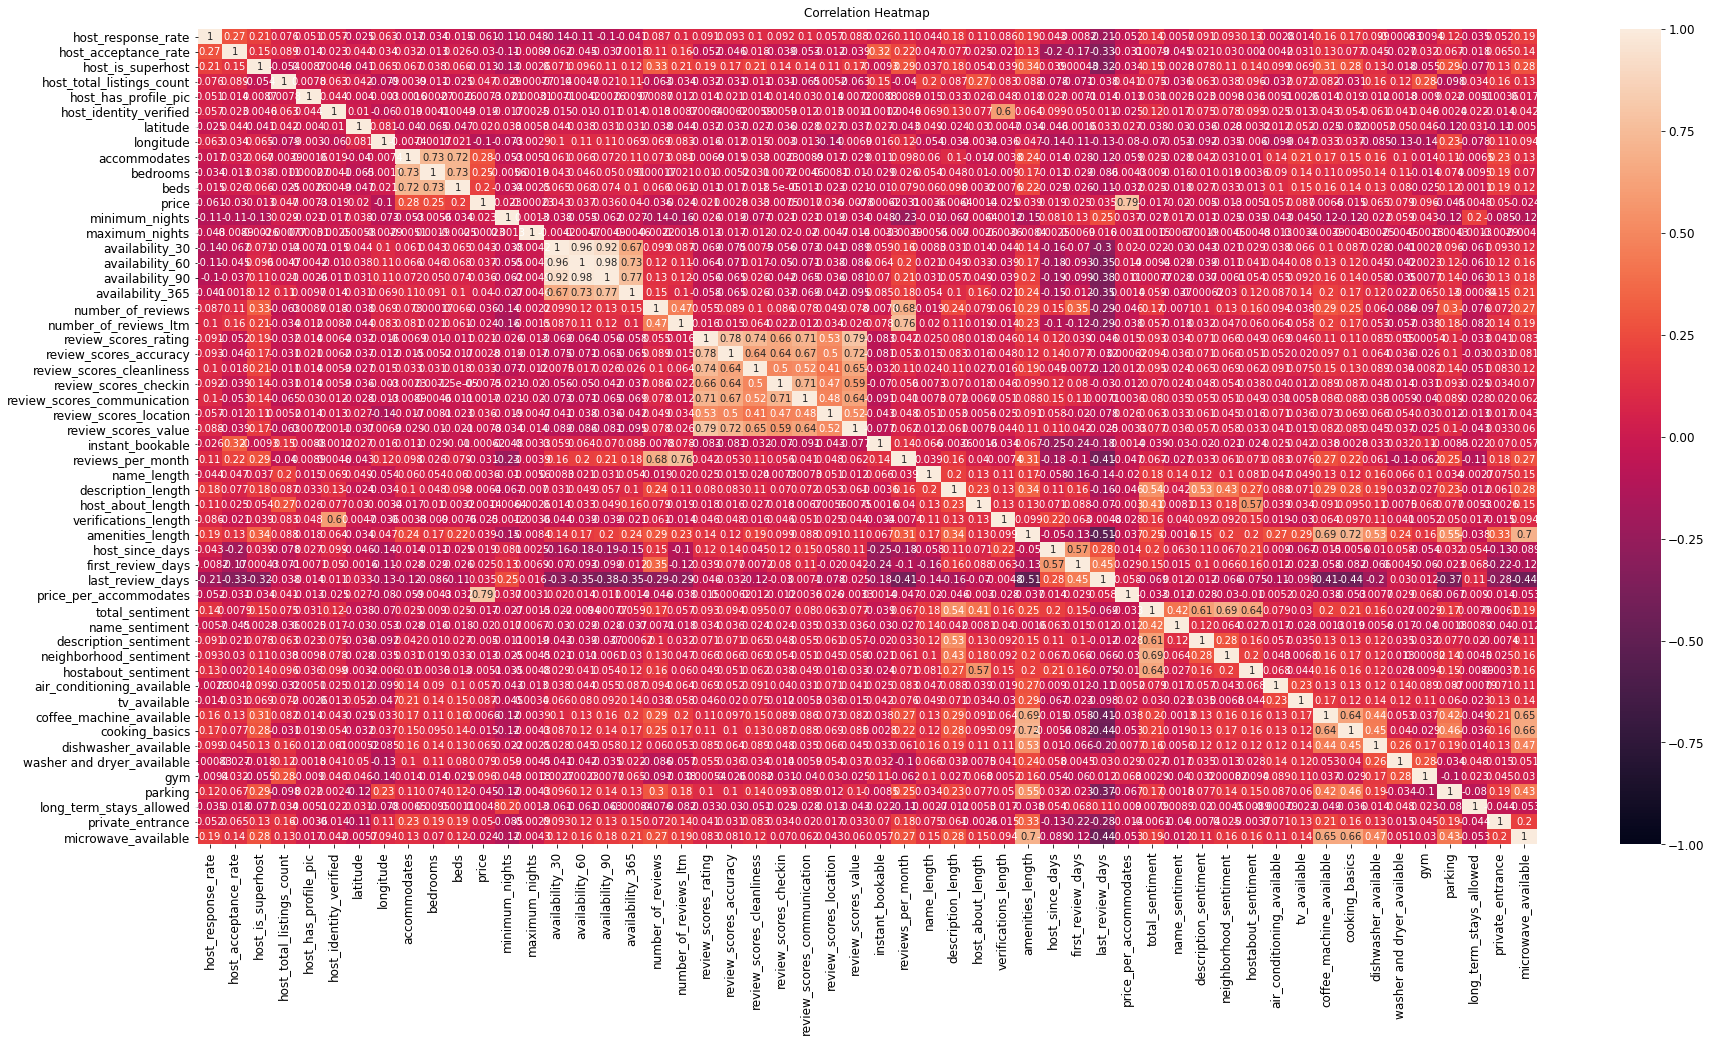

In [46]:
import seaborn as sns
data_corr = df2.corr()
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(data_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [47]:
corr_matrix = df2.corr()

mat = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
mat

availability_60       availability_90             0.983451
availability_30       availability_60             0.964108
                      availability_90             0.924654
review_scores_rating  review_scores_value         0.794091
price                 price_per_accommodates      0.792852
                                                    ...   
reviews_per_month     last_review_days           -0.405986
last_review_days      coffee_machine_available   -0.412779
                      cooking_basics             -0.436137
                      microwave_available        -0.437101
amenities_length      last_review_days           -0.514481
Length: 1431, dtype: float64

Anything above 75% is considered multicollinear. From the above results, we can see that availability_30, availability_60, and availability_90 are highly correlated to each other. Since New York has recently applied a rule that no rental can be less than 30 days, its better to keep availablity_90 and drop the rest. review_scores_ratings, review_scores_accuracy, and review_scores_values are correlated as well so onlt review_score_accuracy will be kept. 

In [48]:
df2 = df2.drop(columns = ['availability_30', 'availability_60','review_scores_rating','review_scores_value'])

In [49]:
corr_matrix=df2.corr()
corr_matrix["price"].sort_values(ascending=False)

price                          1.000000
price_per_accommodates         0.792852
accommodates                   0.276537
bedrooms                       0.251487
beds                           0.201769
gym                            0.095686
tv_available                   0.086851
washer and dryer_available     0.079427
dishwasher_available           0.064528
air_conditioning_available     0.056686
private_entrance               0.049617
host_total_listings_count      0.047327
availability_365               0.040333
amenities_length               0.038721
review_scores_location         0.036454
availability_90                0.035982
last_review_days               0.034556
review_scores_cleanliness      0.033119
first_review_days              0.024820
minimum_nights                 0.023094
latitude                       0.019951
host_since_days                0.019429
coffee_machine_available       0.006619
long_term_stays_allowed        0.004798
name_length                    0.003577


None of the newly added variables correlate highly with the price, so this is good!

**Visualization of all predictors**

In [50]:
#sns.set(style="ticks")

#sns.pairplot(df2, hue="price", palette="Set1")
#plt.show()

**Visualize distribution of numerical variables**

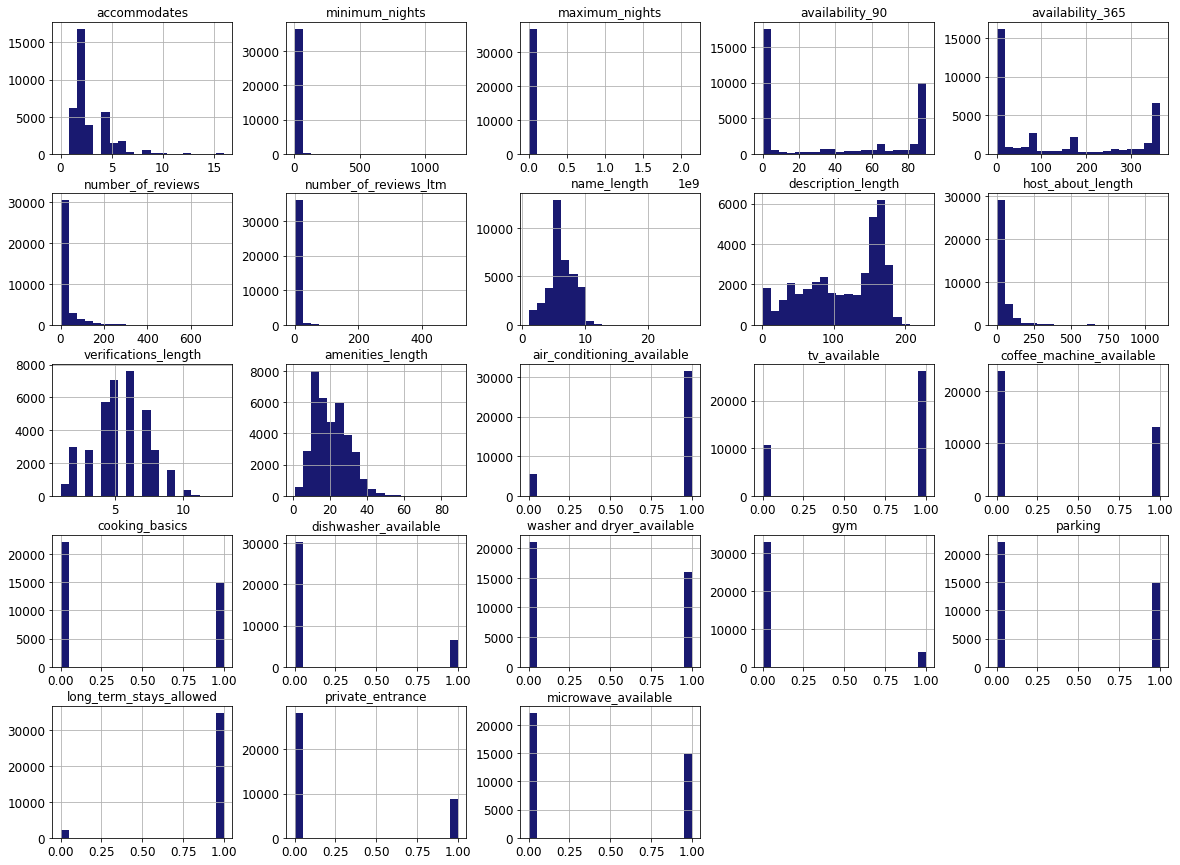

In [51]:
num_vars = df2.select_dtypes('int64', 'float64')

num_vars.hist(bins=20, figsize=(20,15), color='midnightblue')
plt.show();

**Visualize distribution of Categorical Variables**

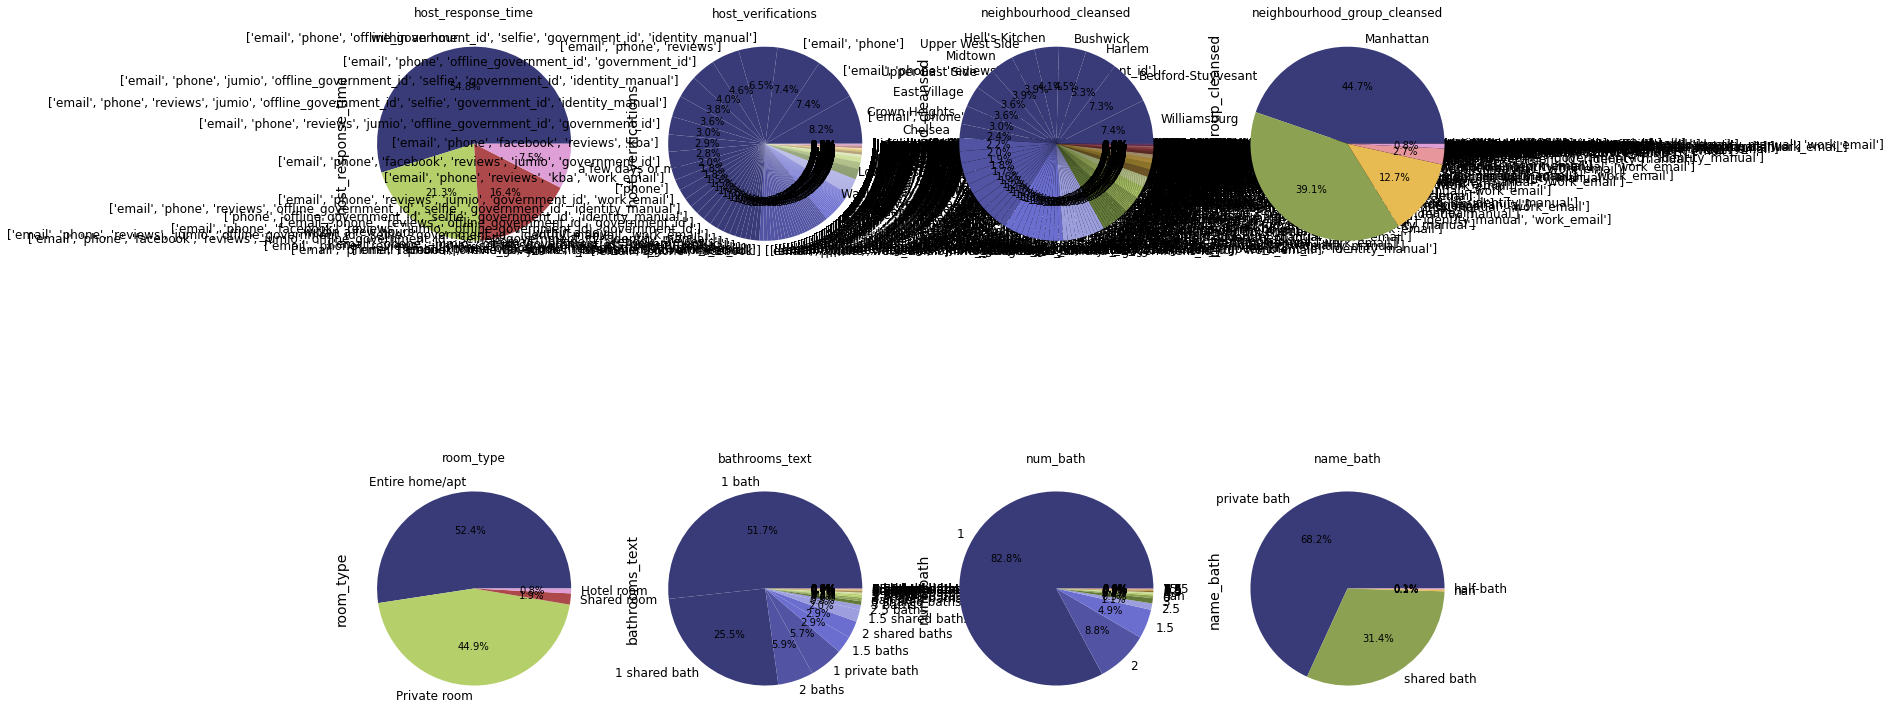

In [52]:
cat_vars = df2.select_dtypes('object')

fig, axes = plt.subplots(round(len(cat_vars.columns) / 4), 4, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    if i < len(cat_vars.columns):
        cat_vars[cat_vars.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax, colormap='tab20b')
        #ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.set_title(cat_vars.columns[i])

fig.tight_layout();

# Data Exploration 

Does score of review rating have an impact on price? 

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'Price as a function of Review Scores Rating')

Text(0.5, 0, 'Review Scores Rating')

Text(0, 0.5, 'Price')

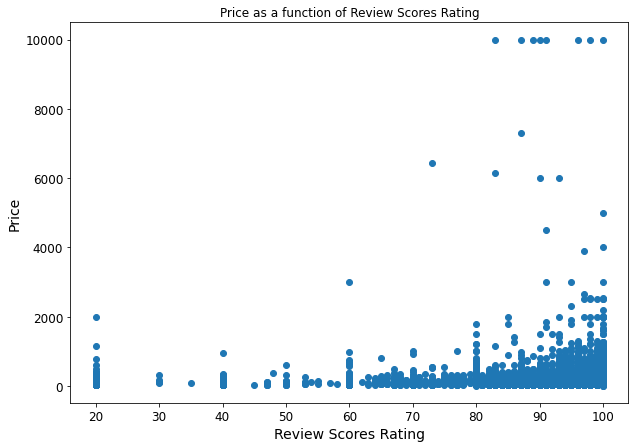

In [53]:
plt.figure(figsize=(10,7))
plt.scatter(x='review_scores_rating', y="price", data=df1)
plt.title('Price as a function of Review Scores Rating') #title
plt.xlabel('Review Scores Rating') #x label
plt.ylabel('Price') #y la

Let's see if there are any amenities that particularly have any impact on the price

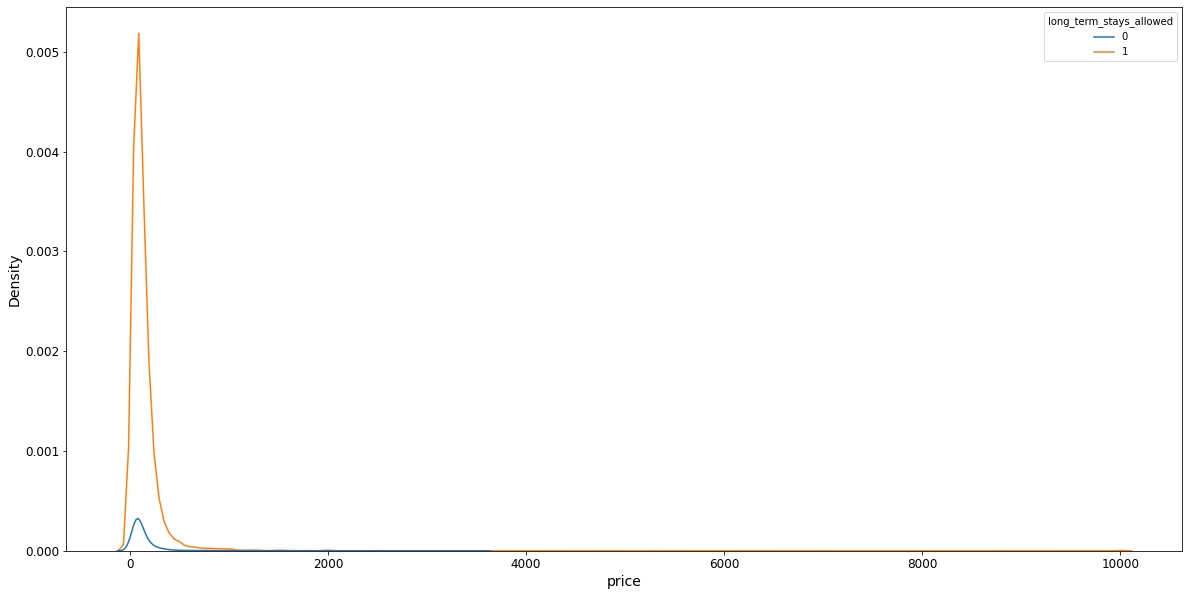

In [63]:
fig = plt.figure(figsize=(20,10)) 
graphs=sns.kdeplot(x = 'price', data=train_set, hue = 'long_term_stays_allowed')

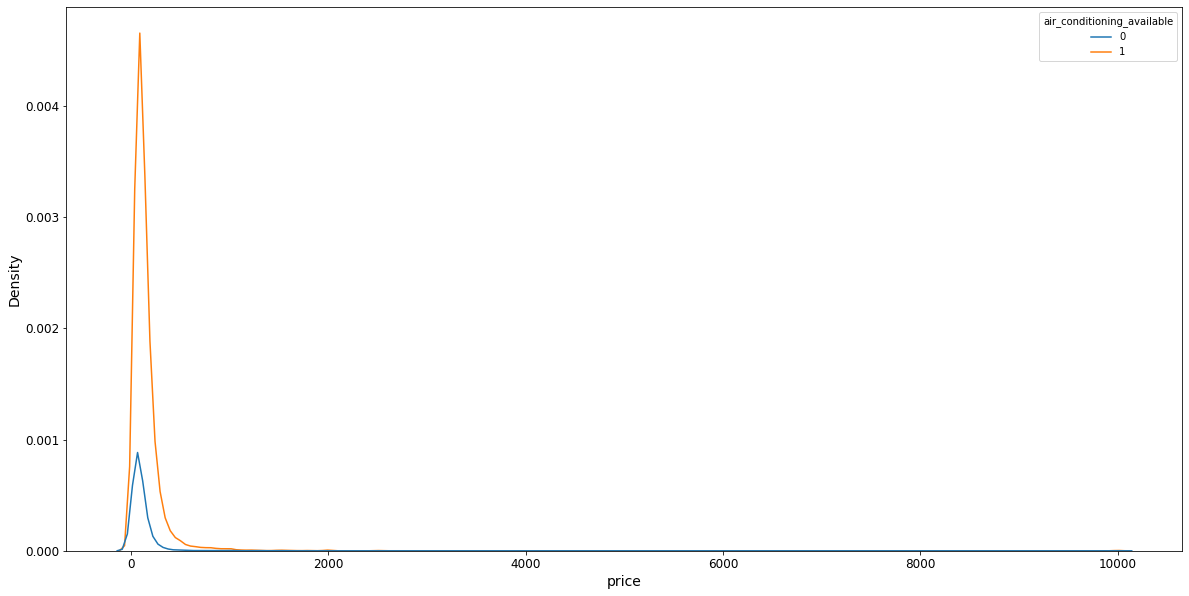

In [64]:
fig = plt.figure(figsize=(20,10)) 
graphs=sns.kdeplot(x = 'price', data=train_set, hue = 'air_conditioning_available')

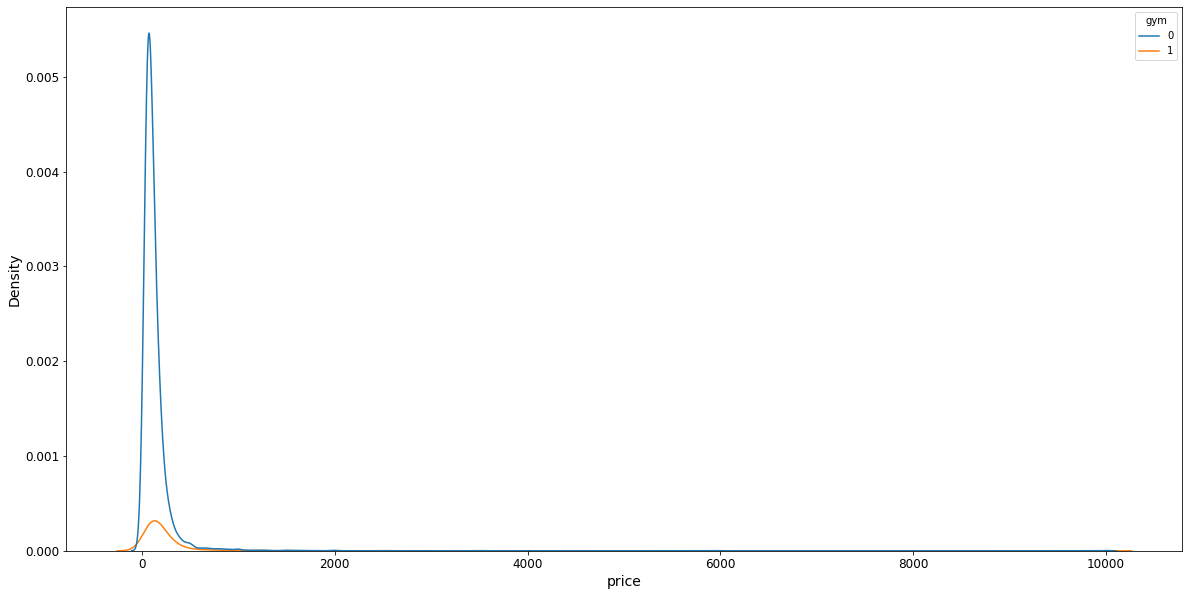

In [65]:
fig = plt.figure(figsize=(20,10)) 
graphs=sns.kdeplot(x = 'price', data=train_set, hue = 'gym', gridsize = 2000)

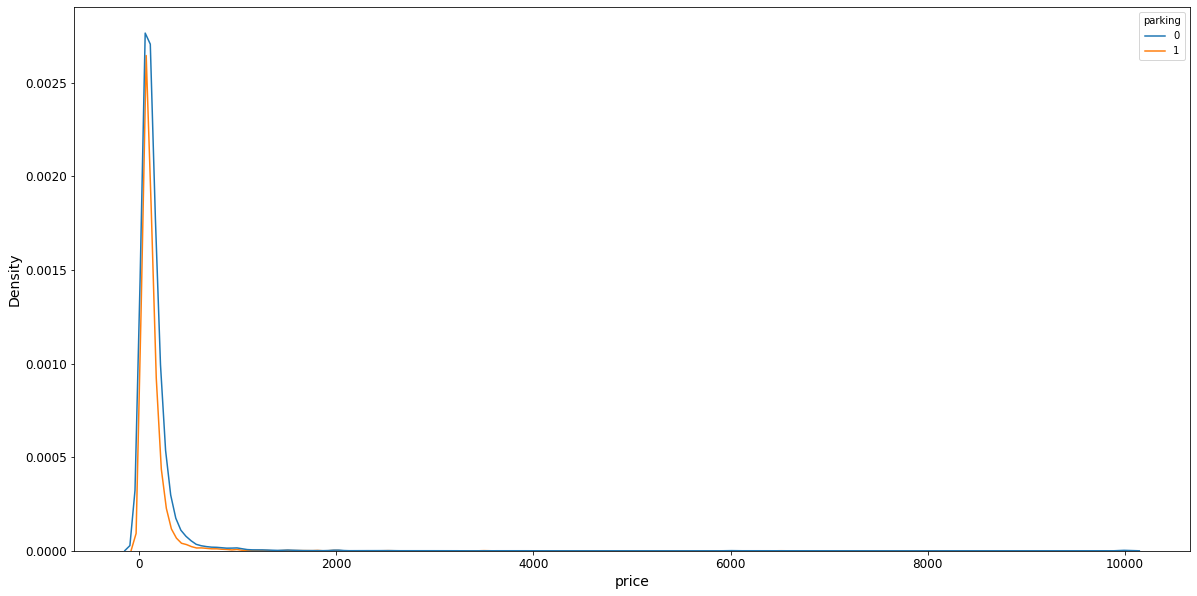

In [66]:
fig = plt.figure(figsize=(20,10)) 
graphs=sns.kdeplot(x = 'price', data=train_set, hue = 'parking')

Effect on amenities length on price

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'Price as a function of length of amenities')

Text(0.5, 0, 'length of Amenities')

Text(0, 0.5, 'Price')

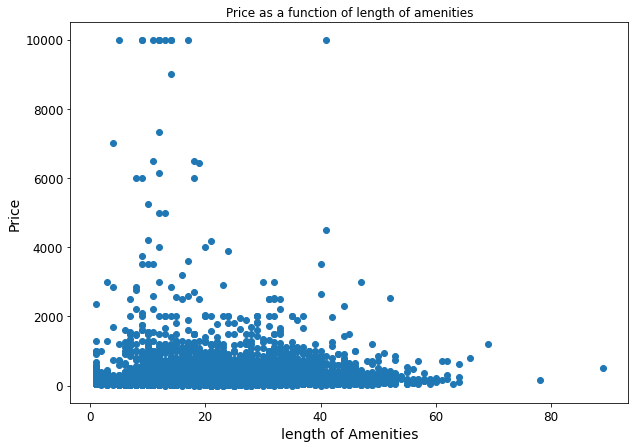

In [67]:
plt.figure(figsize=(10,7))
plt.scatter(x='amenities_length', y="price", data=df1)
plt.title('Price as a function of length of amenities') #title
plt.xlabel('length of Amenities') #x label
plt.ylabel('Price') #y la

# 3 - Data Pre-Processing

### Train-Val-Test Split

In [160]:
#Drop variables that are duplicates
df2 = df2.drop(columns = ['host_verifications','neighbourhood_cleansed', 'latitude','longitude', 'bathrooms_text'])

In [178]:
df3 = df2.copy(deep = True)

In [179]:
df3.shape

(37012, 53)

In [180]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [181]:
train_set,valid_set=split_train_test(df3,0.3)
print("The length of train set is: ",len(train_set))
print("The length of valid set is: ",len(valid_set))

The length of train set is:  25909
The length of valid set is:  11103


In [182]:
valid_set,test_set=split_train_test(valid_set,0.4)
print("The length of valid set is: ",len(valid_set))
print("The length of test set is: ",len(test_set))

The length of valid set is:  6662
The length of test set is:  4441


In [183]:
train_set.shape, test_set.shape

((25909, 53), (4441, 53))

### Missing Values

In [184]:
# Missing values statistics
miss_values = missing_values(train_set)
miss_values

Dataframe has 53 columns.
There are 16 columns that have missing values.


Missing Values  % of Total Values
host_response_time                    12935               49.9
host_response_rate                    12935               49.9
host_acceptance_rate                  10258               39.6
review_scores_checkin                  7153               27.6
review_scores_location                 7153               27.6
review_scores_accuracy                 7146               27.6
review_scores_communication            7142               27.6
review_scores_cleanliness              7136               27.5
reviews_per_month                      6636               25.6
first_review_days                      6636               25.6
last_review_days                       6636               25.6
bedrooms                               2563                9.9
beds                                    345                1.3
host_total_listings_count                14                0.1
host_since_days                          14                0.1
price_per_accommodates                    5                0.0

**FLAGGING MISSING VALUES**

In [185]:
cols = miss_values.index
df_try = train_set[cols].isnull().astype(int).add_suffix('_indicator')
#df_try

#merge both the df1 and the flagged columns
train_set = pd.merge(train_set, df_try, left_index=True, right_index=True)
train_set.head(10)

host_response_time  host_response_rate  host_acceptance_rate  \
34079     within an hour               100.0                 100.0   
17993     within an hour               100.0                 100.0   
35641     within an hour                93.0                  88.0   
23662                NaN                 NaN                   NaN   
34867     within an hour                90.0                  98.0   
1290                 NaN                 NaN                  50.0   
9332      within an hour               100.0                  92.0   
24384                NaN                 NaN                  50.0   
24733                NaN                 NaN                 100.0   
34003     within an hour                89.0                 100.0   

       host_is_superhost  host_total_listings_count  host_has_profile_pic  \
34079                  0                        1.0                     1   
17993                  1                        6.0                     1   
35641                  0                        2.0                     1   
23662                  0                        1.0                     1   
34867                  0                       23.0                     1   
1290                   1                        1.0                     1   
9332                   1                        1.0                     1   
24384                  0                        1.0                     1   
24733                  0                        1.0                     1   
34003                  0                        0.0                     1   

       host_identity_verified neighbourhood_group_cleansed        room_type  \
34079                       1                     Brooklyn  Entire home/apt   
17993                       1                    Manhattan     Private room   
35641                       0                       Queens     Private room   
23662                       1                     Brooklyn     Private room   
34867                       1                    Manhattan     Private room   
1290                        1                     Brooklyn  Entire home/apt   
9332                        1                     Brooklyn     Private room   
24384                       1                     Brooklyn  Entire home/apt   
24733                       1                    Manhattan  Entire home/apt   
34003                       1                    Manhattan  Entire home/apt   

       accommodates  ...  review_scores_communication_indicator  \
34079             2  ...                                      0   
17993             2  ...                                      0   
35641             2  ...                                      0   
23662             2  ...                                      0   
34867             2  ...                                      0   
1290              3  ...                                      0   
9332              2  ...                                      0   
24384             5  ...                                      0   
24733             4  ...                                      0   
34003             2  ...                                      0   

       review_scores_cleanliness_indicator  reviews_per_month_indicator  \
34079                                    0                            0   
17993                                    0                            0   
35641                                    0                            0   
23662                                    0                            0   
34867                                    0                            0   
1290                                     0                            0   
9332                                     0                            0   
24384                                    0                            0   
24733                                    0                            0   
34003                        

**ITERATIVE IMPUTER** For numerical variables

In [186]:
train_set.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'instant_bookable', 'reviews_per_month',
       'name_length', 'description_length', 'host_about_length',
       'verifications_length', 'amenities_length', 'host_since_days',
       'first_review_days', 'last_review_days', 'price_per_accommodates',
       'num_bath', 'name_bath', 'total_sentiment', 'name_sentiment',
       'description_sentiment', 'neighborhood_sentiment',
       'hostabout_sentiment', 'air_condition

In [187]:
#choose numerical variables only
df_num = train_set.drop(columns=['host_response_time', 'neighbourhood_group_cleansed','name_bath', 'room_type'])
#df_num=df3[['host_response_rate', 'host_acceptance_rate','review_scores_value', 'review_scores_location',
#                     'review_scores_checkin','review_scores_accuracy','review_scores_communication',
#                     'review_scores_cleanliness','review_scores_rating','reviews_per_month','first_review_days',
#                     'last_review_days','bedrooms','beds','host_total_listings_count','host_since_days']]

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=0)

df_num1 = imp.fit_transform(df_num)

cols = list(df_num)

df_num1=pd.DataFrame(df_num1)
df_num1.columns=cols

# Re-check Missing values statistics
miss_values = missing_values(df_num1)
miss_values.head(20)

Dataframe has 65 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

**Now, replace the incomplete columns in train_set with the corresponding imputed columns from df_num1**

In [188]:
train_set[cols] = df_num1[cols].values

train_set.head(5)

host_response_time  host_response_rate  host_acceptance_rate  \
34079     within an hour          100.000000            100.000000   
17993     within an hour          100.000000            100.000000   
35641     within an hour           93.000000             88.000000   
23662                NaN           75.339432             84.936178   
34867     within an hour           90.000000             98.000000   

       host_is_superhost  host_total_listings_count  host_has_profile_pic  \
34079                0.0                        1.0                   1.0   
17993                1.0                        6.0                   1.0   
35641                0.0                        2.0                   1.0   
23662                0.0                        1.0                   1.0   
34867                0.0                       23.0                   1.0   

       host_identity_verified neighbourhood_group_cleansed        room_type  \
34079                     1.0                     Brooklyn  Entire home/apt   
17993                     1.0                    Manhattan     Private room   
35641                     0.0                       Queens     Private room   
23662                     1.0                     Brooklyn     Private room   
34867                     1.0                    Manhattan     Private room   

       accommodates  ...  review_scores_communication_indicator  \
34079           2.0  ...                                    0.0   
17993           2.0  ...                                    0.0   
35641           2.0  ...                                    0.0   
23662           2.0  ...                                    0.0   
34867           2.0  ...                                    0.0   

       review_scores_cleanliness_indicator  reviews_per_month_indicator  \
34079                                  0.0                          0.0   
17993                                  0.0                          0.0   
35641                                  0.0                          0.0   
23662                                  0.0                          0.0   
34867                                  0.0                          0.0   

       first_review_days_indicator  last_review_days_indicator  \
34079                          0.0                         0.0   
17993                          0.0                         0.0   
35641                          0.0                         0.0   
23662                          0.0                         0.0   
34867                          0.0                         0.0   

       bedrooms_indicator  beds_indicator  \
34079                 0.0             0.0   
17993                 0.0             0.0   
35641                 0.0             1.0   
23662                 0.0             0.0   
34867                 0.0             0.0   

       host_total_listings_count_indicator  host_since_days_indicator  \
34079                                  0.0                        0.0   
17993                                  0.0                        0.0   
35641                                  0.0                        0.0   
23662                                  0.0                        0.0   
34867                                  0.0                        0.0   

       price_per_accommodates_indicator  
34079                               0.0  
17993                               0.0  
35641                               0.0  
23662                               0.0  
34867                               0.0  

[5 rows x 69 columns]

In [189]:
# Re-check Missing values statistics
miss_values = missing_values(train_set)
miss_values.head(20)

Dataframe has 69 columns.
There are 1 columns that have missing values.


Missing Values  % of Total Values
host_response_time           12935               49.9

**We have taken care of the numerical values, and need to work on the categorical values next...**

In [190]:
train_set['host_response_time'].mode()

0    within an hour
dtype: object

In [191]:
train_set['host_response_time'] = train_set['host_response_time'].fillna("within an hour")

In [192]:
# Check Missing values statistics again
miss_values = missing_values(train_set)
miss_values.head(20)

Dataframe has 69 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

### Categorical Encoding

In [193]:
train_set = pd.get_dummies(train_set, columns=['host_response_time','neighbourhood_group_cleansed','name_bath', 'room_type'])

In [194]:
train_set.head(5)

host_response_rate  host_acceptance_rate  host_is_superhost  \
34079          100.000000            100.000000                0.0   
17993          100.000000            100.000000                1.0   
35641           93.000000             88.000000                0.0   
23662           75.339432             84.936178                0.0   
34867           90.000000             98.000000                0.0   

       host_total_listings_count  host_has_profile_pic  \
34079                        1.0                   1.0   
17993                        6.0                   1.0   
35641                        2.0                   1.0   
23662                        1.0                   1.0   
34867                       23.0                   1.0   

       host_identity_verified  accommodates  bedrooms     beds  price  ...  \
34079                     1.0           2.0       1.0  1.00000   71.0  ...   
17993                     1.0           2.0       1.0  1.00000   83.0  ...   
35641                     0.0           2.0       1.0  0.96775   30.0  ...   
23662                     1.0           2.0       1.0  1.00000   63.0  ...   
34867                     1.0           2.0       1.0  1.00000   85.0  ...   

       neighbourhood_group_cleansed_Staten Island  name_bath_   \
34079                                           0            0   
17993                                           0            0   
35641                                           0            0   
23662                                           0            0   
34867                                           0            0   

       name_bath_half-bath  name_bath_nan  name_bath_private bath  \
34079                    0              0                       1   
17993                    0              0                       0   
35641                    0              0                       0   
23662                    0              0                       0   
34867                    0              0                       1   

       name_bath_shared bath  room_type_Entire home/apt  room_type_Hotel room  \
34079                      0                          1                     0   
17993                      1                          0                     0   
35641                      1                          0                     0   
23662                      1                          0                     0   
34867                      0                          0                     0   

       room_type_Private room  room_type_Shared room  
34079                       0                      0  
17993                       1                      0  
35641                       1                      0  
23662                       1                      0  
34867                       1                      0  

[5 rows x 83 columns]

**Correlations**

In [166]:
corr_matrix = train_set.corr()

mat = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
mat

host_total_listings_count_indicator    host_since_days_indicator                 1.000000
first_review_days_indicator            last_review_days_indicator                1.000000
host_response_time_indicator           host_response_rate_indicator              1.000000
reviews_per_month_indicator            last_review_days_indicator                1.000000
                                       first_review_days_indicator               1.000000
                                                                                   ...   
neighbourhood_group_cleansed_Brooklyn  neighbourhood_group_cleansed_Manhattan   -0.716947
room_type_Entire home/apt              room_type_Private room                   -0.947738
name_bath_private bath                 name_bath_shared bath                    -0.989143
host_response_rate                     host_acceptance_rate                     -0.999980
                                       maximum_nights                           -0.999999
Length: 34

<Figure size 2160x1080 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

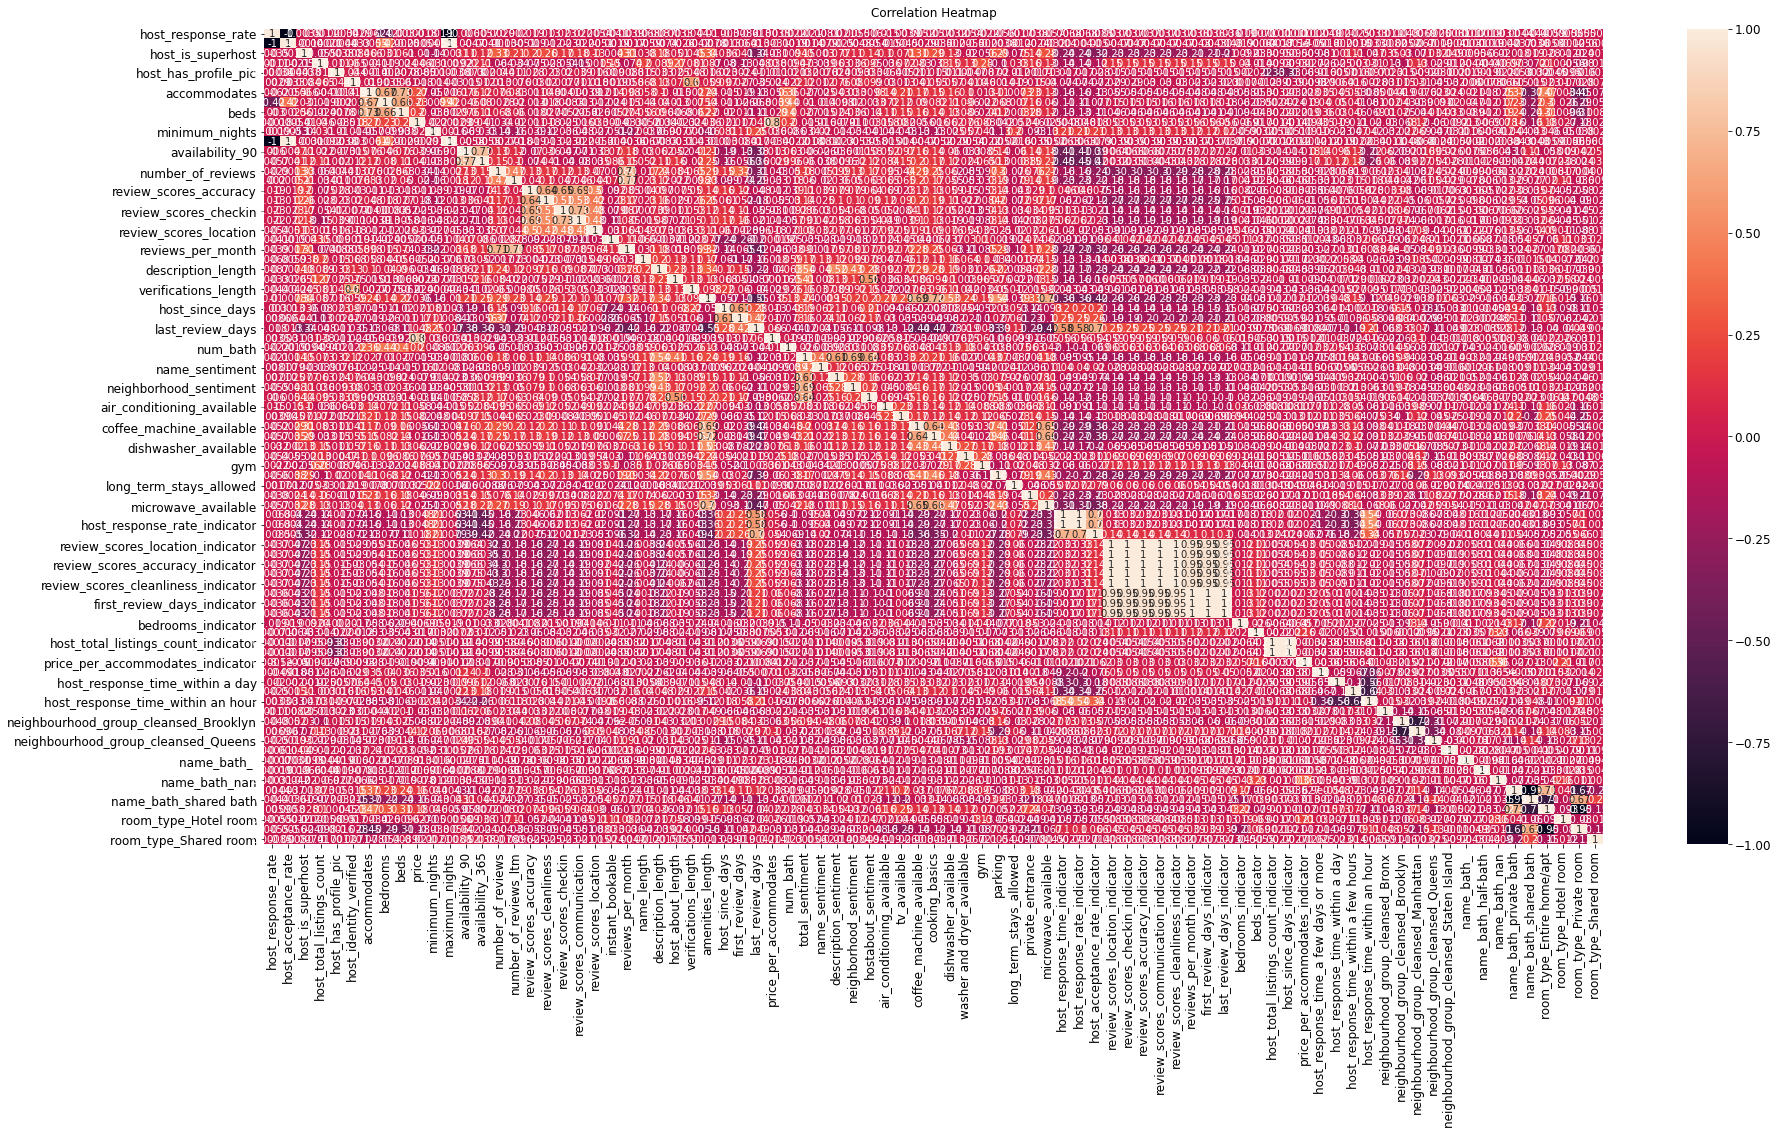

In [167]:
data_corr2 = train_set.corr()
plt.figure(figsize=(30, 15))
heatmap1 = sns.heatmap(data_corr2, vmin=-1, vmax=1, annot=True)
heatmap1.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Dropping highy correlated variables 

In [195]:
train_set = train_set.drop(columns = ['host_response_rate_indicator','host_since_days_indicator','reviews_per_month_indicator','first_review_days_indicator','reviews_per_month_indicator','review_scores_cleanliness_indicator','review_scores_accuracy_indicator','review_scores_checkin_indicator','review_scores_communication_indicator','review_scores_accuracy_indicator','room_type_Private room','maximum_nights','name_bath_shared bath', 'host_acceptance_rate'])

### Pre-Process Validation Set

In [196]:
#Flag Missing Values
miss_values = missing_values(valid_set)
cols = miss_values.index
df_try = valid_set[cols].isnull().astype(int).add_suffix('_indicator')

#merge both the df1 and the flagged columns
valid_set = pd.merge(valid_set, df_try, left_index=True, right_index=True)

#Iterative Imputer
df_num = valid_set.drop(columns=['host_response_time', 'neighbourhood_group_cleansed','name_bath', 'room_type'])
imp = IterativeImputer(random_state=0)
df_num1 = imp.fit_transform(df_num)
cols = list(df_num)
df_num1=pd.DataFrame(df_num1)
df_num1.columns=cols
valid_set[cols] = df_num1[cols].values

#categorical encoding
valid_set['host_response_time'] = valid_set['host_response_time'].fillna("within an hour")
valid_set = pd.get_dummies(valid_set, columns=['host_response_time','neighbourhood_group_cleansed','name_bath', 'room_type'])

#drop correlated variables
valid_set = valid_set.drop(columns = ['host_response_rate_indicator','host_since_days_indicator','reviews_per_month_indicator','first_review_days_indicator','reviews_per_month_indicator','review_scores_cleanliness_indicator','review_scores_accuracy_indicator','review_scores_checkin_indicator','review_scores_communication_indicator','review_scores_accuracy_indicator','room_type_Private room','maximum_nights','name_bath_shared bath', 'host_acceptance_rate'])

Dataframe has 53 columns.
There are 16 columns that have missing values.


### Pre-Processing Test Set

In [197]:
#Flag Missing Values
miss_values = missing_values(test_set)
cols = miss_values.index
df_try = test_set[cols].isnull().astype(int).add_suffix('_indicator')

#merge both the df1 and the flagged columns
test_set = pd.merge(test_set, df_try, left_index=True, right_index=True)

#Iterative Imputer
df_num = test_set.drop(columns=['host_response_time', 'neighbourhood_group_cleansed','name_bath', 'room_type'])
imp = IterativeImputer(random_state=0)
df_num1 = imp.fit_transform(df_num)
cols = list(df_num)
df_num1=pd.DataFrame(df_num1)
df_num1.columns=cols
test_set[cols] = df_num1[cols].values

#categorical encoding
test_set['host_response_time'] = test_set['host_response_time'].fillna("within an hour")
test_set = pd.get_dummies(test_set, columns=['host_response_time','neighbourhood_group_cleansed','name_bath', 'room_type'])

#drop correlated variables
test_set = test_set.drop(columns = ['host_response_rate_indicator','host_since_days_indicator','reviews_per_month_indicator','first_review_days_indicator','reviews_per_month_indicator','review_scores_cleanliness_indicator','review_scores_accuracy_indicator','review_scores_checkin_indicator','review_scores_communication_indicator','review_scores_accuracy_indicator','room_type_Private room','maximum_nights','name_bath_shared bath', 'host_acceptance_rate'])

#Separate Features and Target
y_test = test_set['price']
X_test = test_set.drop(columns=['price','price_per_accommodates_indicator','price_per_accommodates'])


#standardize the data
#sc = StandardScaler()
#X_test_std = sc.transform(X_test)

#drop most useless variables from feature selection
#for i in to_drop:
#     X_test_std= X_test_std.drop(columns = [i])

Dataframe has 53 columns.
There are 16 columns that have missing values.


In [198]:
X_test.columns

Index(['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bedrooms', 'beds', 'minimum_nights', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'instant_bookable', 'reviews_per_month',
       'name_length', 'description_length', 'host_about_length',
       'verifications_length', 'amenities_length', 'host_since_days',
       'first_review_days', 'last_review_days', 'num_bath', 'total_sentiment',
       'name_sentiment', 'description_sentiment', 'neighborhood_sentiment',
       'hostabout_sentiment', 'air_conditioning_available', 'tv_available',
       'coffee_machine_available', 'cooking_basics', 'dishwasher_available',
       'washer and dryer_available', 'gym', 'parking',
       'long_t

### Outlier Treatment

In [199]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(train_set)
score = iforest.decision_function(train_set)

from numpy import where
anom_index = where(pred== -1)
values = train_set.iloc[anom_index]
values

host_response_rate  host_is_superhost  host_total_listings_count  \
35641                93.0                0.0                        2.0   
26175                 0.0                0.0                       21.0   
32335                 0.0                0.0                        5.0   
34158               100.0                0.0                        5.0   
35530                13.0                0.0                        1.0   
...                   ...                ...                        ...   
26826                 0.0                0.0                        0.0   
24947                84.0                0.0                       13.0   
32471                10.0                0.0                        2.0   
32759                 0.0                0.0                        1.0   
24861                70.0                0.0                        0.0   

       host_has_profile_pic  host_identity_verified  accommodates  bedrooms  \
35641                   1.0                     0.0           2.0       1.0   
26175                   1.0                     0.0           6.0       3.0   
32335                   0.0                     1.0           4.0       1.0   
34158                   1.0                     1.0          12.0       4.0   
35530                   1.0                     1.0           4.0       2.0   
...                     ...                     ...           ...       ...   
26826                   1.0                     0.0           1.0       1.0   
24947                   1.0                     1.0          16.0       1.0   
32471                   1.0                     1.0           8.0       2.0   
32759                   1.0                     0.0           4.0       2.0   
24861                   1.0                     1.0          12.0       4.0   

          beds   price  minimum_nights  ...  \
35641  0.96775    30.0             5.0  ...   
26175  3.00000   383.0            30.0  ...   
32335  1.00000    70.0            30.0  ...   
34158  4.00000   900.0            30.0  ...   
35530  4.00000   200.0             1.0  ...   
...        ...     ...             ...  ...   
26826  1.00000    43.0            60.0  ...   
24947  0.00000  1199.0             1.0  ...   
32471  7.00000    99.0             1.0  ...   
32759  2.00000   100.0           120.0  ...   
24861  7.00000   357.0             2.0  ...   

       neighbourhood_group_cleansed_Manhattan  \
35641                                       0   
26175                                       1   
32335                                       0   
34158                                       1   
35530                                       0   
...                                       ...   
26826                                       0   
24947                                       1   
32471                                       0   
32759                                       1   
24861                                       1   

       neighbourhood_group_cleansed_Queens  \
35641                                    1   
26175                                    0   
32335                                    0   
34158                                    0   
35530                                    1   
...                                    ...   
26826                                    0   
24947                                    0   
32471                                    0   
32759                                    0   
24861                                    0   

       neighbourhood_group_cleansed_Staten Island  name_bath_   \
35641                                           0            0   
26175                                           0            0   
32335                                           0            0   
34158                                           0            0   
35530                                           0            0   
...                                           ...     

**NOTE: Out of 22208 observations, there are 445 outliers. We will remove the outliers.**

In [200]:
train_set = train_set[~train_set.index.isin(values.index)]
train_set.shape

(25390, 71)

In [201]:
train_set.columns

Index(['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'instant_bookable', 'reviews_per_month',
       'name_length', 'description_length', 'host_about_length',
       'verifications_length', 'amenities_length', 'host_since_days',
       'first_review_days', 'last_review_days', 'price_per_accommodates',
       'num_bath', 'total_sentiment', 'name_sentiment',
       'description_sentiment', 'neighborhood_sentiment',
       'hostabout_sentiment', 'air_conditioning_available', 'tv_available',
       'coffee_machine_available', 'cooking_basics', 'dishwasher_available',
       'washer and dryer_av

**Separate Predictors and Target Variable**

In [202]:
y_train = train_set['price']
X_train = train_set.drop(columns=['price',  'price_per_accommodates_indicator','price_per_accommodates']) ##taking anything related to price to avoid data leakage

In [203]:
y_valid = valid_set['price']
X_valid= valid_set.drop(columns=['price',  'price_per_accommodates_indicator','price_per_accommodates']) ##taking anything related to price to avoid data leakage

### Standardize Data

In [204]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

In [205]:
X_valid_std = pd.DataFrame(X_valid_std,columns = X_valid.columns)
X_train_std = pd.DataFrame(X_train_std,columns = X_train.columns)

X_test_std = pd.DataFrame(X_test_std,columns = X_test.columns)


### Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0)

model = randomforest.fit(X_train_std,y_train)

model.feature_importances_

pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)), columns = ['predictor','feature importance']).sort_values("feature importance")

In [125]:
model_features = pd.DataFrame(list(zip(X_train_std.columns,model.feature_importances_)), columns = ['predictor','feature importance']).sort_values("feature importance")
model_features.tail(20)

predictor  feature importance
9             availability_90            0.021567
2   host_total_listings_count            0.022445
10           availability_365            0.025049
33        hostabout_sentiment            0.025212
14  review_scores_cleanliness            0.025301
30             name_sentiment            0.027548
22          host_about_length            0.028756
23       verifications_length            0.028772
11          number_of_reviews            0.029706
32     neighborhood_sentiment            0.031288
20                name_length            0.031297
0          host_response_rate            0.032691
24           amenities_length            0.038488
19          reviews_per_month            0.041737
21         description_length            0.042716
31      description_sentiment            0.043104
29            total_sentiment            0.043143
27           last_review_days            0.043522
25            host_since_days            0.043777
26          first_review_days            0.044152

In [126]:
#Recursive Feature Elimination Method
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rfe = RFE(rf, n_features_to_select=50)
model_l = rfe.fit(X_train_std, y_train)

In [127]:
model_l_df = pd.DataFrame(list(zip(X_train_std.columns,model_l.ranking_)), columns = ['predictor','ranking'])
model_l_df

predictor  ranking
0          host_response_rate        1
1           host_is_superhost        6
2   host_total_listings_count        1
3        host_has_profile_pic       11
4      host_identity_verified        1
..                        ...      ...
63              name_bath_nan       15
64     name_bath_private bath        1
65  room_type_Entire home/apt        1
66       room_type_Hotel room        7
67      room_type_Shared room       14

[68 rows x 2 columns]

In [128]:
notgood = model_l_df[model_l_df['ranking'] !=1 ]
notgood

predictor  ranking
1                            host_is_superhost        6
3                         host_has_profile_pic       11
36                    coffee_machine_available        4
37                              cooking_basics        8
42                     long_term_stays_allowed        2
44                         microwave_available        5
50                              beds_indicator       12
51         host_total_listings_count_indicator       19
54       host_response_time_within a few hours       10
56          neighbourhood_group_cleansed_Bronx       16
57       neighbourhood_group_cleansed_Brooklyn        9
59         neighbourhood_group_cleansed_Queens       13
60  neighbourhood_group_cleansed_Staten Island       17
61                                 name_bath_         3
62                         name_bath_half-bath       18
63                               name_bath_nan       15
66                        room_type_Hotel room        7
67                       room_type_Shared room       14

In [129]:
to_drop = notgood['predictor'].to_list()

In [130]:
#Removing the features that are useless to our model

for i in to_drop:
     X_train_std= X_train_std.drop(columns = [i])

In [131]:
for i in to_drop:
     X_valid_std= X_valid_std.drop(columns = [i])

In [132]:
X_valid_std.shape, y_valid.shape, X_train.shape, y_train.shape

((6662, 50), (6662,), (25390, 68), (25390,))

# 4 - Machine Learning

## A) Unsupervised Learning

### PCA

StandardScaler()

PCA(n_components=2)

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'First principal component')

Text(0, 0.5, 'Second Principal Component')

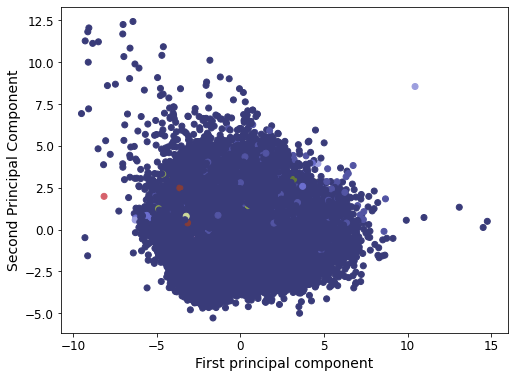

In [133]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(train_set)
scaled_data = scaler.transform(train_set)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=train_set['price'],cmap='tab20b')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

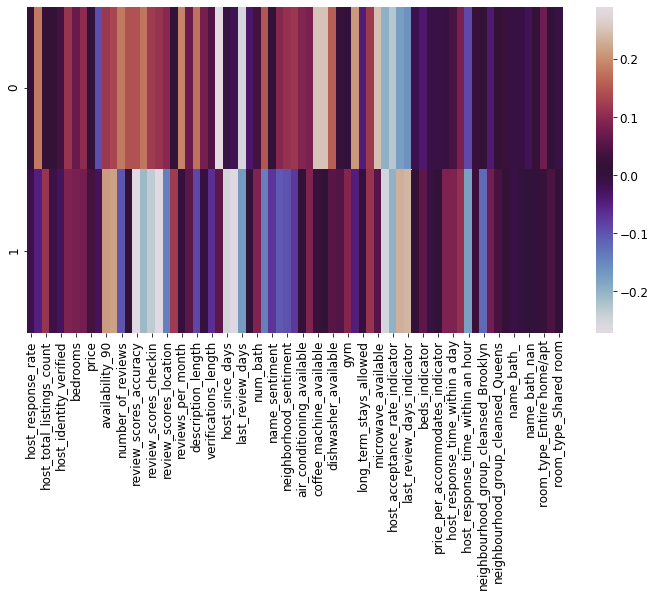

In [134]:
map= pd.DataFrame(pca.components_,columns=train_set.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

## AUTOENCODER 

In [145]:
from tensorflow import keras
encoder = keras.models.Sequential([
    keras.layers.Dense(3, input_shape=[50]),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(50, input_shape=[3]),
])

autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=0.01))

history = autoencoder.fit(X_train_std,X_train_std, epochs=20,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=5)])
                         
codings = encoder.predict(X_test_std)

Epoch 1/20
794/794 [==============================] - 1s 787us/step - loss: 1.0399 - val_loss: 1.0102
Epoch 2/20
794/794 [==============================] - 1s 718us/step - loss: 0.9380 - val_loss: 0.9356
Epoch 3/20
794/794 [==============================] - 1s 718us/step - loss: 0.8662 - val_loss: 0.8731
Epoch 4/20
794/794 [==============================] - 1s 832us/step - loss: 0.8208 - val_loss: 0.8419
Epoch 5/20
794/794 [==============================] - 1s 774us/step - loss: 0.7969 - val_loss: 0.8231
Epoch 6/20
794/794 [==============================] - 1s 849us/step - loss: 0.7824 - val_loss: 0.8106
Epoch 7/20
794/794 [==============================] - 2s 3ms/step - loss: 0.7722 - val_loss: 0.8016
Epoch 8/20
794/794 [==============================] - 1s 735us/step - loss: 0.7643 - val_loss: 0.7936
Epoch 9/20
794/794 [==============================] - 1s 773us/step - loss: 0.7576 - val_loss: 0.7868
Epoch 10/20
794/794 [==============================] - 1s 739us/step - loss: 0.7523 

In [140]:
X_test_std

host_response_rate  host_is_superhost  host_total_listings_count  \
0               0.005495          -0.488402                  -0.138704   
1               0.005140          -0.488402                  -0.138704   
2               0.005534          -0.488402                  -0.138704   
3               0.005511          -0.488402                  -0.138704   
4               0.007502           2.047493                  -0.131611   
...                  ...                ...                        ...   
4436            0.002591          -0.488402                  -0.117424   
4437            0.007282          -0.488402                  -0.145797   
4438            0.007502           2.047493                  -0.110330   
4439            0.005426          -0.488402                  -0.138704   
4440            0.005625          -0.488402                  -0.138704   

      host_has_profile_pic  host_identity_verified  accommodates  bedrooms  \
0                 0.058974                0.498769     -0.994034 -0.392942   
1                 0.058974                0.498769      0.135030  0.066499   
2                 0.058974                0.498769     -0.429502 -0.392942   
3                 0.058974                0.498769      0.135030 -0.392942   
4                 0.058974                0.498769      2.393156  0.985346   
...                    ...                     ...           ...       ...   
4436              0.058974               -2.004937     -0.429502 -0.392942   
4437              0.058974                0.498769     -0.429502 -0.392942   
4438              0.058974                0.498769     -0.429502 -0.392942   
4439              0.058974               -2.004937      1.828624  2.363635   
4440              0.058974                0.498769     -0.429502 -0.392942   

          beds  minimum_nights  availability_90  ...  \
0    -0.466330        0.261036        -0.936540  ...   
1     0.451954        0.261036        -0.936540  ...   
2    -0.466330        0.261036        -0.936540  ...   
3    -0.466330        0.261036        -0.936540  ...   
4     0.451954       -0.783171        -0.936540  ...   
...        ...             ...              ...  ...   
4436  0.451954        0.261036         1.324597  ...   
4437 -0.466330        0.261036        -0.509436  ...   
4438 -0.466330       -0.860520         1.073360  ...   
4439  1.370238        0.261036        -0.936540  ...   
4440 -0.466330        0.261036        -0.936540  ...   

      neighbourhood_group_cleansed_Manhattan  \
0                                  -0.898039   
1                                   1.113537   
2                                  -0.898039   
3                                   1.113537   
4                                  -0.898039   
...                                      ...   
4436                               -0.898039   
4437                               -0.898039   
4438                                1.113537   
4439                                1.113537   
4440                                1.113537   

      neighbourhood_group_cleansed_Queens  \
0                               -0.376892   
1                               -0.376892   
2                               -0.376892   
3                               -0.376892   
4                               -0.376892   
...                                   ...   
4436                            -0.376892   
4437                            -0.376892   
4438                            -0.376892   
4439                            -0.376892   
4440                            -0.376892   

      neighbourhood_group_cleansed_Staten Island  name_bath_   \
0                                       -0.08888    -0.031394   
1                                       -0.08888    -0.031394   
2                                       -0.08888    -0.031394   
3                                       -0.08888    -0.031394   
4                                       -0.08888    -0.031394   

In [139]:
X_train_std

host_response_rate  host_total_listings_count  host_identity_verified  \
0                0.005461                   0.719598                0.498769   
1                0.007116                  -0.003929                0.498769   
2                0.004959                  -0.138704                0.498769   
3                0.005418                  -0.138704                0.498769   
4                0.005557                  -0.138704                0.498769   
...                   ...                        ...                     ...   
25385            0.005941                  -0.138704                0.498769   
25386            0.005915                  -0.138704                0.498769   
25387            0.005844                  -0.138704                0.498769   
25388            0.004583                  -0.138704               -2.004937   
25389            0.007020                  -0.138704               -2.004937   

       accommodates  bedrooms      beds  minimum_nights  availability_90  \
0         -0.429502 -0.198853 -0.466330        0.261036        -0.911416   
1         -0.429502 -0.055552  0.451954        0.261036         0.771875   
2         -0.429502 -0.392942 -0.466330        0.261036        -0.936540   
3         -0.429502 -0.392942 -1.384614        0.261036        -0.936540   
4         -0.429502 -0.392942 -0.466330        0.261036        -0.936540   
...             ...       ...       ...             ...              ...   
25385     -0.429502 -0.392942 -0.466330        0.261036        -0.936540   
25386     -0.429502 -0.392942 -0.466330       -0.860520        -0.936540   
25387     -0.429502 -0.392942 -0.466330        0.261036        -0.936540   
25388      0.699561  0.985346  0.451954        0.261036        -0.936540   
25389     -0.429502 -0.392942 -0.466330        0.261036        -0.936540   

       availability_365  number_of_reviews  ...  \
0             -0.871901          -0.461419  ...   
1              0.816367          -0.168795  ...   
2             -0.878736          -0.377812  ...   
3             -0.878736          -0.482321  ...   
4             -0.878736          -0.273303  ...   
...                 ...                ...  ...   
25385         -0.878736          -0.440517  ...   
25386         -0.878736          -0.482321  ...   
25387         -0.878736          -0.315107  ...   
25388         -0.878736          -0.440517  ...   
25389         -0.878736          -0.064286  ...   

       host_acceptance_rate_indicator  review_scores_location_indicator  \
0                           -0.815090                         -0.611123   
1                           -0.815090                         -0.611123   
2                            1.226858                         -0.611123   
3                            1.226858                          1.636331   
4                            1.226858                         -0.611123   
...                               ...                               ...   
25385                        1.226858                         -0.611123   
25386                        1.226858                          1.636331   
25387                        1.226858                         -0.611123   
25388                        1.226858                         -0.611123   
25389                       -0.815090                         -0.611123   

       last_review_days_indicator  bedrooms_indicator  \
0                       -0.580534             3.06410   
1                       -0.580534             3.06410   
2                       -0.580534            -0.32636   
3                        1.722553            -0.32636   
4                       -0.580534            -0.32636   
...                           ...                 ...   
25385                   -0.580534            -0.32636   
25386                    1.722553            -0.32636   
25387                   -0.580534            -0.32636   
25388                   -0.580534            -0.3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD
 
##Encoder
encoder = Sequential()
encoder.add(Flatten(input_shape=[88]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(2,activation="relu"))
 
### Decoder
decoder = Sequential()
decoder.add(Dense(50,input_shape=[2],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(88, activation="relu"))
decoder.add(Reshape([88]))
 
### Autoencoder
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse", optimizer = keras.optimizers.SGD(lr=0.1))
autoencoder.fit(X_train_std,X_train_std,epochs=10, callbacks=[keras.callbacks.EarlyStopping(patience=5)])
 
encoded_2dim = encoder.predict(X_test_std)
 
# The 2D
AE = pd.DataFrame(encoded_2dim, columns = ['X1', 'X2'])
 
AE['target'] = y_test
 
sns.lmplot(x='X1', y='X2', data=AE, hue='target', fit_reg=False, size=10)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.lmplot(x='X1', y='X2', data=AE, hue='target', fit_reg=False, size=5)
plt.gca().set_xlim(0, 20)

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x='X1', y='X2', data=AE, hue='target', fit_reg=True, size=5)
plt.gca().set_ylim(0, 20)
plt.gca().set_xlim(0, 10)

## B) Semi-Supervised Learning

In [102]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.semi_supervised import LabelSpreading

### To mask data to labeled and unlabeled

In [103]:
import numpy as np
import random

In [104]:
from sklearn.metrics import mean_squared_error
from numpy import concatenate
def runLP(x,target,x_test,target_test,n):
        

    data = x
    labels = target

    X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(data, labels, test_size=n, random_state=123)
    #RUN THE MODEL
    X_train_mixed = concatenate((X_train_lab, X_test_unlab))
    # create "no label" for unlabeled data
    nolabel = [-1 for _ in range(len(y_test_unlab))]
    # recombine training dataset labels
    y_train_mixed = concatenate((y_train_lab, nolabel))
    print(y_train_mixed)
    model = LabelSpreading(max_iter=100)
    model.fit(X_train_mixed, y_train_mixed)
    pred = np.array(model.predict(x_test))
    #SEPARATE PREDICTED SAMPLES
    print(model.predict(x).sum())

    
    #PRINT CONFUSION MATRIX
    return model, mean_squared_error(target_test, pred),target_test,pred

In [105]:
train_set.columns

Index(['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'instant_bookable', 'reviews_per_month',
       'name_length', 'description_length', 'host_about_length',
       'verifications_length', 'amenities_length', 'host_since_days',
       'first_review_days', 'last_review_days', 'price_per_accommodates',
       'num_bath', 'total_sentiment', 'name_sentiment',
       'description_sentiment', 'neighborhood_sentiment',
       'hostabout_sentiment', 'air_conditioning_available', 'tv_available',
       'coffee_machine_available', 'cooking_basics', 'dishwasher_available',
       'washer and dryer_av

In [106]:
train_set.describe().columns

Index(['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'instant_bookable', 'reviews_per_month',
       'name_length', 'description_length', 'host_about_length',
       'verifications_length', 'amenities_length', 'host_since_days',
       'first_review_days', 'last_review_days', 'price_per_accommodates',
       'num_bath', 'total_sentiment', 'name_sentiment',
       'description_sentiment', 'neighborhood_sentiment',
       'hostabout_sentiment', 'air_conditioning_available', 'tv_available',
       'coffee_machine_available', 'cooking_basics', 'dishwasher_available',
       'washer and dryer_av

In [107]:
target=train_set['price']
x=train_set[train_set.describe().columns].drop(['price'],axis=1)
x=x.to_numpy()
target_test=test_set['price']
x_test=test_set[test_set.describe().columns].drop(['price'],axis=1)
x_test=x_test.to_numpy()

In [108]:
target_test.to_numpy()

array([ 40., 150.,  70., ...,  62., 395., 125.])

In [109]:
model, matrix,labels,pred=runLP(x,target,x_test,target_test,0.5)

NameError: name 'train_test_split' is not defined

In [110]:
pd.DataFrame(model.predict(x)).describe()

ValueError: X has 70 features, but DecisionTreeClassifier is expecting 68 features as input.

In [111]:
pd.DataFrame(labels).describe()

NameError: name 'labels' is not defined

In [112]:
pd.DataFrame(pred).describe()

0
count  25909.000000
mean       0.959937
std        0.280222
min       -1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000

In [113]:
train_set.columns

Index(['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'instant_bookable', 'reviews_per_month',
       'name_length', 'description_length', 'host_about_length',
       'verifications_length', 'amenities_length', 'host_since_days',
       'first_review_days', 'last_review_days', 'price_per_accommodates',
       'num_bath', 'total_sentiment', 'name_sentiment',
       'description_sentiment', 'neighborhood_sentiment',
       'hostabout_sentiment', 'air_conditioning_available', 'tv_available',
       'coffee_machine_available', 'cooking_basics', 'dishwasher_available',
       'washer and dryer_av

## C) Supervised Learning

Add AutoML here or in another file

**INSIGHTS:**

**Now that we have an idea of what model will perform best, we can go ahead with building of the model**

## Model Building

## Use Case 1:  For Existing Airbnb Hosts Who Want to Adjust their Prices

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_std, y_train)
pred1 = rf.predict(X_valid_std)
rf_mse = mean_squared_error(y_test, pred1)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

**SVR**

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_std, y_train)
predictions = svm_reg.predict(X_valid_std)
svm_mse = mean_squared_error(y_test, pred1)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

**XGBoost**

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(X_train_std, y_train)

preds = xg_reg.predict(X_valid_std)
xgbt_rmse = np.sqrt(mean_squared_error(y_test, preds))
xgbt_rmse

**Gradient Boosting Tree**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gbt = GradientBoostingRegressor(random_state=0)
model2 = gbt.fit(X_train_std,y_train)
y_test_pred_gbt = model2.predict(X_valid_std)
gbt_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_gbt))
gbt_rmse

**LGBM**

In [ ]:
from lightgbm import LGBMRegressor
# fit the model on the whole dataset
lgbm_reg_model = LGBMRegressor()
lgbm_reg_model.fit(X_train_std, y_train)

#Testing
lgbm_reg_pred = lgbm_reg_model.predict(X_valid_std)
lgbm_reg_mse = mean_squared_error(y_test, lgbm_reg_pred)
lgbm_reg_rmse = np.sqrt(lgbm_reg_mse)
lgbm_reg_rmse

In [ ]:
**Graphing RMSEs**

In [ ]:
df = {'Models': ["Random Forest Regressor","Gradient Boosting Regressor", 'XG Boost','LightGBM','SVR'],
     'RMSE': [rf_rmse,gbt_rmse,xgbt_rmse,lgbm_reg_rmse,svm_rmse]
     }

summary = pd.DataFrame(df)

In [ ]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="RMSE",y="Models",data=summary)
plt.xlabel("RMSE", size=14)
plt.ylabel("Models", size=14)

### Hyperparameter Tuning with MLFlow

### Final Model for Use Case 1
**Test Model on Test Set**

### Pre-Process Test Set

In [120]:
#Flag Missing Values
miss_values = missing_values(test_set)
cols = miss_values.index
df_try = test_set[cols].isnull().astype(int).add_suffix('_indicator')

#merge both the df1 and the flagged columns
test_set = pd.merge(test_set, df_try, left_index=True, right_index=True)

#Iterative Imputer
df_num = test_set.drop(columns=['host_response_time', 'neighbourhood_group_cleansed','name_bath', 'room_type'])
imp = IterativeImputer(random_state=0)
df_num1 = imp.fit_transform(df_num)
cols = list(df_num)
df_num1=pd.DataFrame(df_num1)
df_num1.columns=cols
test_set[cols] = df_num1[cols].values

#categorical encoding
test_set['host_response_time'] = test_set['host_response_time'].fillna("within an hour")
test_set = pd.get_dummies(test_set, columns=['host_response_time','neighbourhood_group_cleansed','name_bath', 'room_type'])

#drop correlated variables
test_set = test_set.drop(columns = ['host_response_rate_indicator','host_since_days_indicator','reviews_per_month_indicator','first_review_days_indicator','reviews_per_month_indicator','review_scores_cleanliness_indicator','review_scores_accuracy_indicator','review_scores_checkin_indicator','review_scores_communication_indicator','review_scores_accuracy_indicator','room_type_Private room','maximum_nights','name_bath_shared bath', 'host_acceptance_rate'])

#Separate Features and Target
y_test = test_set['price']
X_test = test_set.drop(columns=['price','price_per_accommodates_indicator','price_per_accommodates'])


#standardize the data
sc = StandardScaler()
X_test_std = sc.transform(X_test)

#drop most useless variables from feature selection
for i in to_drop:
     X_test_std= X_test_std.drop(columns = [i])

Dataframe has 53 columns.
There are 16 columns that have missing values.


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**Test Model on Test Set**

In [ ]:
Test the model here

## Use Case 2:  New Airbnb Users Who Want to Know What Price to Set for their New Listing

**Edit the X_train to exclude data that may cause data leakage**

In [ ]:
df_new = df1.drop(columns = ['id', 'listing_url', 'scrape_id',
       'picture_url', 'host_id', 'host_url', 'host_name','host_location',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count',  'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'neighbourhood',
       'bathrooms', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'number_of_reviews_l30d', 'license',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_total_listings_count','number_of_reviews', 'reviews_per_month'])

df1.head()

**RANDOM FOREST**

**SVR**

**XGBOOST**

**HYPERPAREMETER TUNING WITH MLFLOW HYPEROPT**

**TEST FINAL MODEL ON TEST SET**

### Starbucks Effect

Brief Description of starbucks effect: ....

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
df_airbnb=pd.read_csv(('http://data.insideairbnb.com/united-states/ny/new-york-city/2021-02-04/data/listings.csv.gz'))

In [ ]:
df_airbnb['neighbourhood_group_cleansed'].value_counts()
df1.groupby('neighbourhood_group_cleansed')['price_per_accommodates'].mean()

In [ ]:
df_places = gpd.read_file('new-york.geojson')
df_places['airbnb_num']=[289,4704,14474,16553,992]
df_places['starbucks_num']=[36,50,50,223,50]
df_places['price_per_acc']=[28.97,32.44,39.97,55.44,31.93]

In [ ]:
f, ax = plt.subplots(1, figsize=(15, 12))
ax =df_places.plot(column='airbnb_num',ax=ax,legend=True)

plt.show()

In [ ]:
f, ax = plt.subplots(1, figsize=(15, 12))
ax =df_places.plot(column='starbucks_num',ax=ax,legend=True)

plt.show()

In [ ]:
f, ax = plt.subplots(1, figsize=(15, 12))
ax =df_places.plot(column='price_per_acc',ax=ax,legend=True)

plt.show()

- Remove the text attribute because median can only be calculated on numerical attributes:

# ~ EXTRA ~

In [ ]:
#Get the statistic value for each numerical columns
df1.describe()

In [ ]:
# Get the numerical columns' distribution
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(20,15),grid=False)

plt.show()
plt.savefig("attribute_histogram_plots.png")

In [ ]:
#Plot the correlation plot among the numerical varaibles
import seaborn as sns
matrix = np.triu(df1.corr())
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df1.corr(), annot = True,mask=matrix)

fig.show()
plt.savefig("correlation_plot")

### 4. Split test and train sets

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [ ]:
df_drop_na=df1.dropna()

In [ ]:
df_drop_na.info()

# Discover and visualize the data to gain insights

### 1. Draw the word cloud for text variables

### 3. Get the general insight for Airbnb dataset

In [ ]:
#get the data type for each column of variable
df1.info()

The word cloud for "description", <br>
which can help us to get the most popular words for hosts to describe thier Airbnb apartments.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
i=0
for val in df1['description']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
    i=i+1
    if i%10000==0:
        print('finished: ',i)
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment')
mask = np.array(Image.open("liberty_statue.jpg"))


wordcloud = WordCloud(width = 800, height =900 , 
            stopwords = stopwords, 
            max_words=800,
            background_color="white",
            colormap='RdYlGn',
            mask=mask,
            min_font_size = 5,                      
            collocations=True,
            contour_color='lightgrey',
            contour_width=1).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (50, 30)) 
plt.imshow(wordcloud) 

plt.axis("off") 
#plt.tight_layout(pad = 0) 

plt.savefig("wordcloud_desription.jpg")

plt.show()



The word cloud for "host_about", <br>
which can help us to get the most popular words for hosts to introduce themselves

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)

i=0
sentences=''
for val in df1['host_about']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
    i=i+1
    if i%5000==0:
        print('finished: ',i)
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment').replace('je suis','')
mask = np.array(Image.open("liberty_statue.jpg"))

image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(width = 800, height =900 , 
            stopwords = stopwords, 
            max_words=1000,
            background_color="white",
            colormap='RdYlGn',
            mask=mask,
            min_font_size = 5,                      
            collocations=True,
            contour_color='lightgrey',
            contour_width=1).generate(comment_words) 


# plot the WordCloud image                        
plt.figure(figsize = (50, 30)) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 

plt.savefig("wordcloud_host_about")
plt.show()


The word cloud for "name", <br>
which can help us to get the most popular words for hosts to entitle thier Airbnb apartments.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
for val in df1['name']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment').replace('je suis','')
mask = np.array(Image.open("liberty_statue.jpg"))

image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(width = 800, height =900 , 
            stopwords = stopwords, 
            max_words=1000,
            background_color="white",
            colormap='RdYlGn',
            mask=mask,
            min_font_size = 5,                      
            collocations=True,
            contour_color='lightgrey',
            contour_width=1).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (50, 30)) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 

plt.savefig("wordcloud_name")

plt.show()

### 2. Geographic Distribution

In [ ]:
df1.plot(kind="scatter", x="longitude", y="latitude")
plt.savefig("bad_visualization_plot")

In [ ]:
df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.savefig("better_visualization_plot")

In [ ]:
df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df1["number_of_reviews"], label="number_of_reviews", figsize=(10,7),
    c="review_scores_rating", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.savefig("Airbnb_review_rating_scatterplot")

In [ ]:
import matplotlib.image as mpimg
california_img=mpimg.imread('map_nyc.png')
ax = df1.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=df1["number_of_reviews"], label="number_of_reviews",
                       c="review_scores_rating", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-74.2, -73.7, 40.5, 40.90], alpha=0.4,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

rating = df1["review_scores_rating"]
tick_values = np.linspace(rating.min(), rating.max(), 10)
cbar = plt.colorbar(ticks=tick_values/rating.max())
cbar.ax.set_yticklabels([(round(v)) for v in tick_values], fontsize=14)
cbar.set_label('review_scores_rating', fontsize=16)

plt.legend(fontsize=16)
plt.savefig("Montreal_Airbnb_review_rating_scatterplot")
plt.show()

### 3. Get the correlation value between target variable ("review_scores_rating") and other predictors

In [ ]:
corr_matrix2 = df1.corr()

In [ ]:
corr_matrix2["review_scores_rating"].sort_values(ascending=False)

In [ ]:
corr_matrix["review_scores_rating"].sort_values(ascending=False)

### Compare the correlation value before and after adding new features, we can see that the new feature of "amenities_length","price_per_accommodates" and "has_hair_dryer" are all the predictors have the high correlation with the target variable

### 4. Draw the scatter matrix plot for the top 4 correlated varibles with review_scores_rating

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["review_scores_rating", "host_is_superhost", "amenities_length",
              "price_per_accommodates",'host_total_listings_count']
scatter_matrix(df1[attributes], figsize=(20, 20))
plt.savefig("scatter_matrix_plot")

In [ ]:
df1.plot(kind="scatter", x="host_total_listings_count", y="review_scores_rating",
             alpha=0.1)
plt.axis([0, 273, 40, 101])
plt.savefig("listing_counts_vs_rating_scatterplot")

In [ ]:
df1.plot(kind="scatter", x="amenities_length", y="review_scores_rating",
             alpha=0.1)
plt.axis([0, 273, 40, 101])
plt.savefig("income_vs_house_value_scatterplot")

In [ ]:
df1.describe()

# ML models